In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load data from csv file
data = pd.read_csv('CII-VNINDEX-History.csv')
data_vn = data.copy()
data_vn.head()

,Unnamed: 0,Open,High,Low,Close,Volume,TradingDate
0,0,10850.0,10563.0,10563.0,10563.0,275600,2006-05-18
1,1,10308.0,10032.0,10032.0,10032.0,443520,2006-05-19
2,2,9809.0,9548.0,9548.0,9548.0,64200,2006-05-22
3,3,9331.0,9079.0,9079.0,9079.0,12760,2006-05-23
4,4,8876.0,8641.0,8641.0,8641.0,46460,2006-05-24


In [ ]:
data_vn = data_vn.drop(columns=['Unnamed: 0'])
data_vn.head()

,Open,High,Low,Close,Volume,TradingDate
0,10850.0,10563.0,10563.0,10563.0,275600,2006-05-18
1,10308.0,10032.0,10032.0,10032.0,443520,2006-05-19
2,9809.0,9548.0,9548.0,9548.0,64200,2006-05-22
3,9331.0,9079.0,9079.0,9079.0,12760,2006-05-23
4,8876.0,8641.0,8641.0,8641.0,46460,2006-05-24


# Preprocess

In [ ]:
data_slice = slice(None, -1)
data_vn.iloc[0, data_slice]

,0
Open,10850.0
High,10563.0
Low,10563.0
Close,10563.0
Volume,275600


In [ ]:
import preprocess as pp

In [ ]:
# get samples to predict close price on the next 5th day
samples = pp.get_data_samples_kth_day(data_vn, 5, data_slice, label_colID=-3)

In [ ]:
X_data = samples[0]
y_data = samples[1]
print(y_data[0])

[7119.]


# MODELS

## input shape

In [ ]:
window_size = 30
num_features = pp.get_num_features(data_slice, data_vn)
num_features

5

## lstm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_lstm(input_shape):
  # Define the model
  model_lstm = Sequential([
      LSTM(64, input_shape=input_shape, return_sequences=True),
      Dropout(0.2),
      LSTM(64, return_sequences=True),
      Dropout(0.1),
      LSTM(64, return_sequences=False),
      Dropout(0.1),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_lstm

In [ ]:
model_lstm = create_lstm((window_size, num_features))
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,569 (353.79 KB)

 Trainable params: 90,569 (353.79 KB)

 Non-trainable params: 0 (0.00 B)

## GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_gru(input_shape):
  # Define the model
  model_gru = Sequential([
      GRU(64, input_shape=input_shape, return_sequences=True),
      GRU(32, return_sequences=False),
      Dropout(0.1),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_gru

In [ ]:
model_gru = create_gru((window_size, num_features))
model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 64)              │          13,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │           3,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,441 (103.29 KB)

 Trainable params: 26,441 (103.29 KB)

 Non-trainable params: 0 (0.00 B)

##BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_bilstm(input_shape):
  # Define the model
  model_bilstm = Sequential([
      LSTM(64, input_shape=input_shape, return_sequences=True),
      Bidirectional(LSTM(64, return_sequences=True)),
      Bidirectional(LSTM(32, return_sequences=False)),
      Dropout(0.2),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_bilstm

In [ ]:
model_bilstm = create_bilstm((window_size, num_features))
model_bilstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 30, 128)             │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,785 (514.79 KB)

 Trainable params: 131,785 (514.79 KB)

 Non-trainable params: 0 (0.00 B)

## BiGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_bigru(input_shape):
  # Define the model
  model_bigru = Sequential([
      GRU(64, input_shape=input_shape, return_sequences=True),
      Bidirectional(GRU(64, return_sequences=True)),
      Bidirectional(GRU(32, return_sequences=False)),
      Dropout(0.2),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_bigru

In [ ]:
model_bigru = create_bigru((window_size, num_features))
model_bigru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 64)              │          13,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 30, 128)             │          49,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          31,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,257 (395.54 KB)

 Trainable params: 101,257 (395.54 KB)

 Non-trainable params: 0 (0.00 B)

# FUNCTIONS

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf
# Adjust the optimizer and learning rate
#optimizer = Adam(learning_rate=0.001)
def compile(model, optimizer):
  model.compile(
      loss='mean_squared_error',
      optimizer=optimizer,
      metrics=['mae']
  )
def get_callbacks(file_path):
  # Training callbacks
  callbacks = [
      EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
      ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  ]
  return callbacks

def train_history(model, batch_size, epochs, callbacks, X_train_norm, y_train_norm, validation_data):
  # Fit the model with data augmentation
  model_training_history = model.fit(
      X_train_norm, y_train_norm,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_val_norm, y_val_norm),
      callbacks=callbacks
  )
  return model_training_history

In [ ]:
def plot_performance(history):
    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot loss
    axes[0].plot(history.history['loss'])
    axes[0].plot(history.history['val_loss'])
    axes[0].set_title('Model Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='upper right')

    # Plot mae
    axes[1].plot(history.history['mae'])
    axes[1].plot(history.history['val_mae'])
    axes[1].set_title('Model mae')
    axes[1].set_ylabel('mae')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Val'], loc='upper left')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
# Evaluate
from sklearn.metrics import mean_squared_error

def get_model_n_evaluate(model_path, X_test_norm, y_test_norm):
  model = tf.keras.models.load_model(model_path)
  result = model.evaluate(X_test_norm, y_test_norm)
  print(model.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
  print("Loss and mae on the test set: loss = {}, mae = {}".format(result[0],result[1]))
  return model

def get_reverse_prediction(loaded_model, X_test_norm, y_scaler):
  # Get prediction on the test data
  y_pred_norm = loaded_model.predict(X_test_norm)
  print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

  # Now, to denormalize the norm data back to the original scale:
  y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

  # Check the shapes
  print("Shape of denormalized training set: ", y_pred_denorm.shape)
  return y_pred_denorm


In [ ]:
# Visualize preditec stock price versus real stock price
def plot_prediction(y_pred_denorm, y_test, title):
  plt.figure(figsize=(16, 8), dpi=300)
  plt.plot(y_pred_denorm, label='Predicted price')
  plt.plot(y_test, label='Real price')
  plt.title('Stock trend prediction in one day', fontsize=16)
  plt.xlabel('Time (days)', fontsize=14)
  plt.ylabel('Open price in $', fontsize=14)
  plt.grid() # Add grid
  plt.legend() # Add legend
  plt.show()

In [ ]:
def plot_prediction_timestep(y_pred_denorm, y_test, title, time_steps=np.arange(0, 1)):
  plt.figure(figsize=(16, 8), dpi=300)
  # Plot for the first sample only
  plt.plot(time_steps, y_pred_denorm[500], label='Predicted Prices', linestyle='--', marker='o')
  plt.plot(time_steps, y_test[500], label='Real Prices', linestyle='-', marker='x')

  # Add titles, labels, and legend
  plt.title('Predicted vs Real Open Prices Over the Next 5th Day for Sample 500', fontsize=16)
  plt.xlabel('Days', fontsize=14)
  plt.ylabel('Open Price in $', fontsize=14)
  plt.xticks(time_steps)  # Set x-ticks to represent days
  plt.grid()  # Add grid
  plt.legend()  # Add legend
  plt.show()


# time series split train

In [ ]:
# Step 1: Split to train and test set
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy


# Split the entire dataset into train (80%) and test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data,
                                                              test_size=0.2,
                                                              random_state=42,
                                                              shuffle=False)

# Convert X_train_full and y_train_full to NumPy arrays
X_train_full = np.array(X_train_full) # Convert to NumPy array
y_train_full = np.array(y_train_full) # Convert to NumPy array
X_test = np.array(X_test) # Convert to NumPy array
y_test = np.array(y_test) # Convert to NumPy array

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# in this code i create 6 scaler for 6 feature, and 1 scaler for all the y data. The issue is that I should use param(scaler) by fitting x to
# transform y using that param. But now i have 6 params for x and i just need 1 param for y. so how to handle this.
# Initialize the MinMaxScaler for each feature
#y_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train_full.copy()
#X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train_full.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train_full[:, :, i])
    #X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train_full)
    #y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
#print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
#print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (3320, 30, 5)
Shape of scaled test set:  (831, 30, 5)

Shape of scales training label  (3320, 1)
Shape of scales test label  (831, 1)


In [ ]:
# Step 2: Time series split for training set
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
loss_score = []

mc = keras.callbacks.ModelCheckpoint(filepath="/content/model_gru_ts.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Loop through each split generated by TimeSeriesSplit
for train_index, val_index in tscv.split(X_train_norm):
    # Use different variable names for clarity
    X_train_split, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_split, y_val = y_train_norm[train_index], y_train_norm[val_index]

    X_train = np.array(X_train_split)
    X_val = np.array(X_val)
    y_train = np.array(y_train_split)
    y_val = np.array(y_val)
    # Reshape the numpy array to fit the neural network input shape requirement
    X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
    X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
    X_test = X_test.reshape(X_test.shape[0], window_size, num_features)
    model_gru = create_gru((window_size, num_features))
    model_gru.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mae'])
    # Train the model. Using Colab for training
    history_gru_ts = model_gru.fit(X_train_norm, y_train_norm, # Data feature and data label
                    batch_size=2048, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training
    loss= model_gru.evaluate(X_val, y_val)
    loss_score.append(loss)
    print(f"Validation loss for fold: {loss}")

print(f"Mean validation loss: {np.mean(loss_score)}")
print(f"Standard deviation of validation loss: {np.std(loss_score)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - loss: 0.0056 - mae: 0.0630 - val_loss: 0.0028 - val_mae: 0.0460
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - mae: 0.0473
Validation loss for fold: [0.00281702121719718, 0.046037230640649796]
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 865ms/step - loss: 0.1759 - mae: 0.3624 - val_loss: 0.2180 - val_mae: 0.4467
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 809ms/step - loss: 0.0925 - mae: 0.2549 - val_loss: 0.1131 - val_mae: 0.3182
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - loss: 0.0449 - mae: 0.1688 - val_loss: 0.0444 - val_mae: 0.1929
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step - loss: 0.0175 - mae: 0.0965 - val_loss: 0.0100 - val_mae: 0.0783
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step - loss: 0.0067 - mae: 0.0620 - val_loss: 0.0026 - val_mae: 0.0402
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step - loss: 0.0069 - mae: 0.0716 - val_loss: 0.0027 - val_mae: 0.0446
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - loss: 0.0

In [ ]:
print("=========GRU===========")
model_gru_ts = get_model_n_evaluate("/content/model_gru_ts.keras", X_test_norm, y_test_norm)
y_pred_denom_gru_ts = get_reverse_prediction(model_gru_ts, X_test_norm, y_scaler)

=========GRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - mae: 0.0542
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.009909757412970066, mae = 0.06102568656206131
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
MSE on the test set:  0.009909758085134363
Shape of denormalized training set:  (831, 1)


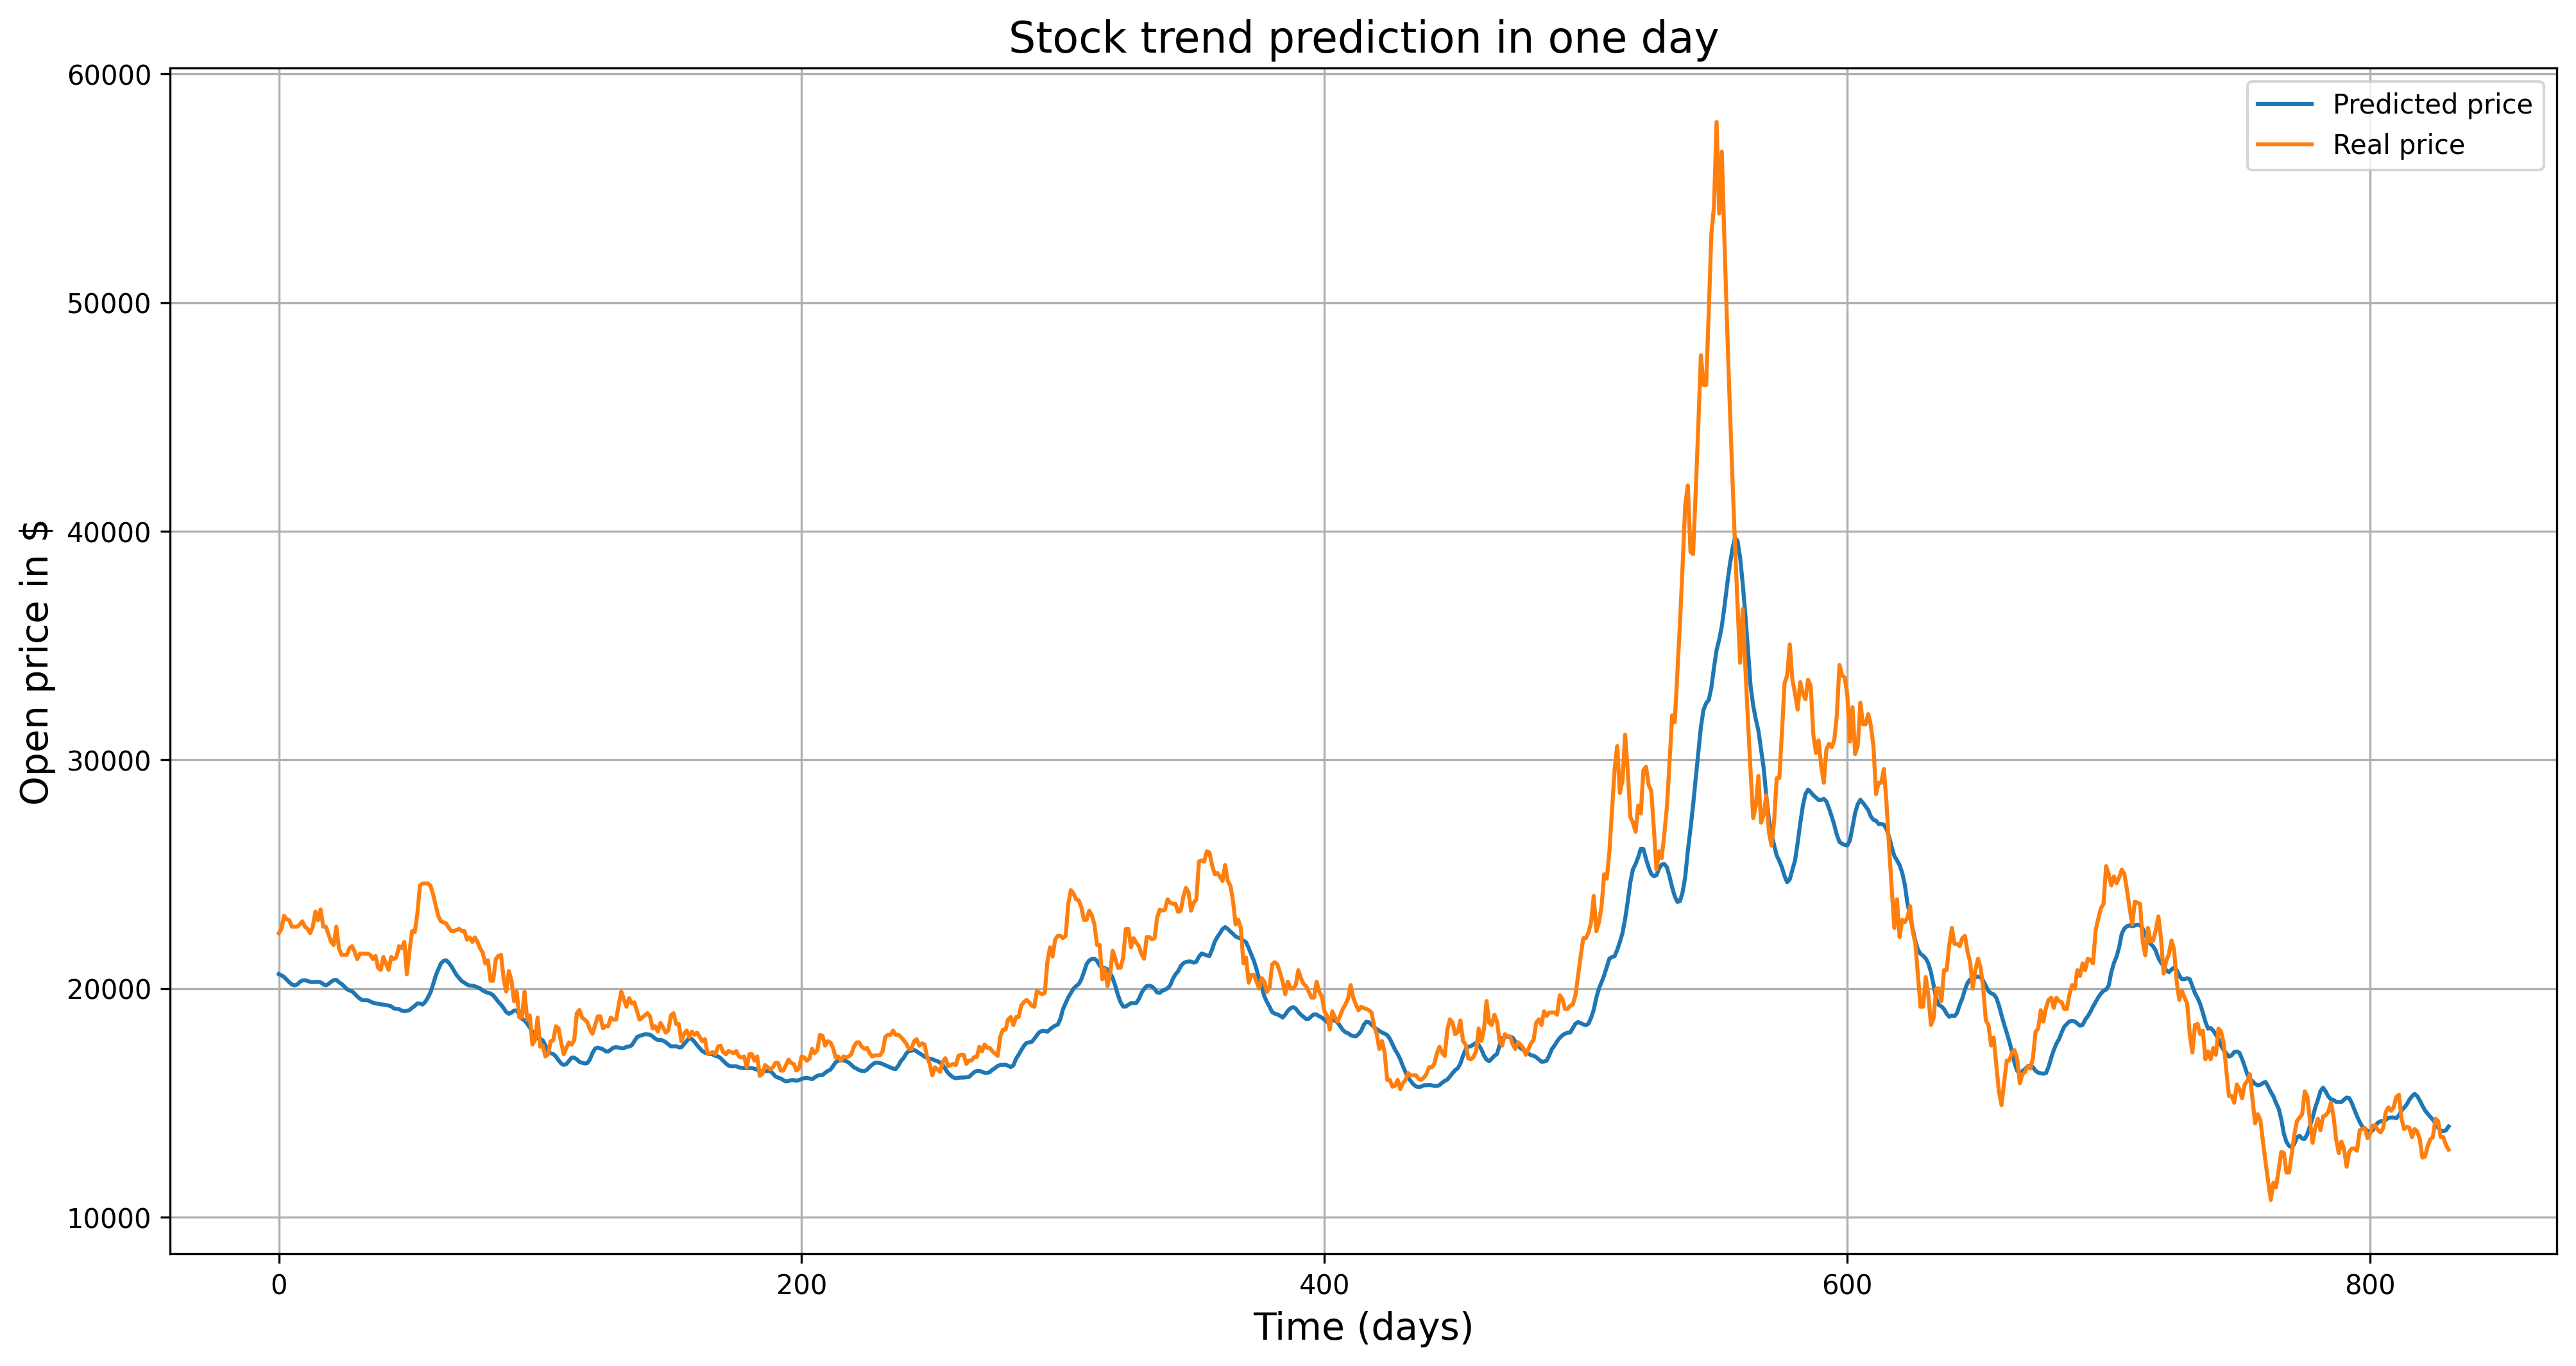

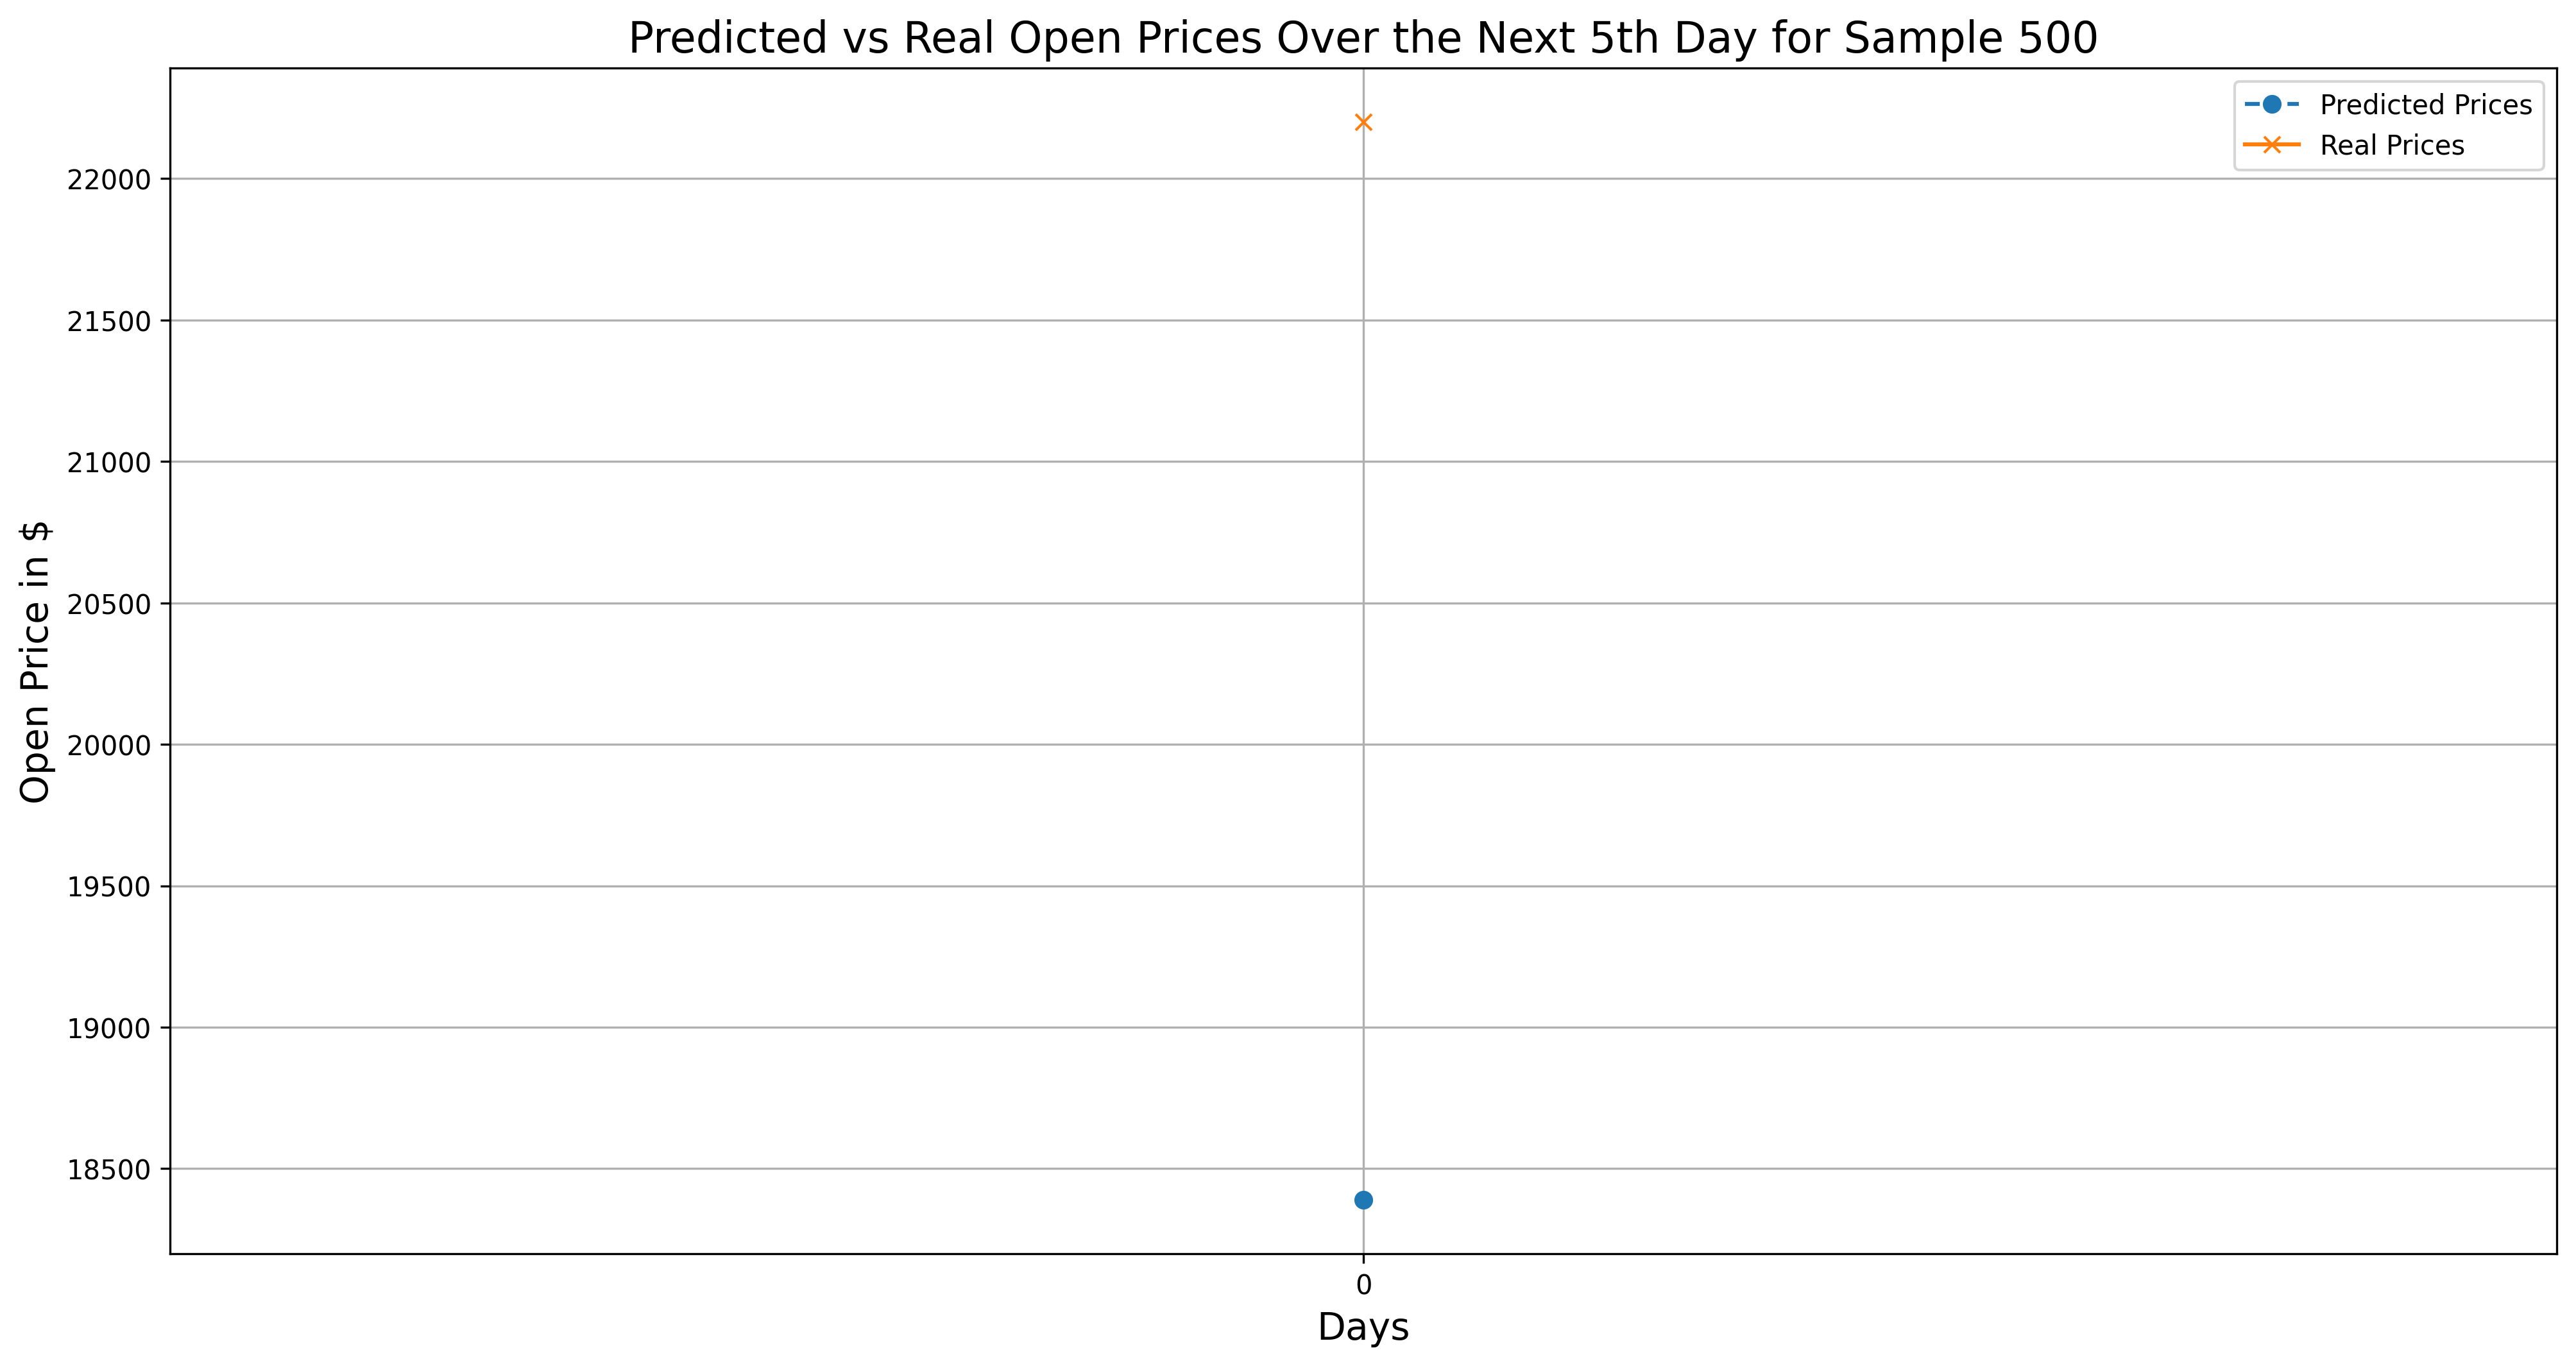

In [ ]:
plot_prediction(y_pred_denom_gru_ts, y_test, "GRU")
plot_prediction_timestep(y_pred_denom_gru_ts, y_test, "GRU")

In [ ]:
stop here if only want to train with time series split

# normal train

In [ ]:
splited_sets = pp.split_data(X_data, y_data)
X_train = splited_sets[0]
X_val = splited_sets[1]
X_test = splited_sets[2]

y_train = splited_sets[3]
y_val = splited_sets[4]
y_test = splited_sets[5]

In [ ]:
y_train.shape

(2656, 1)

In [ ]:
y_train

array([[ 7119.],
       [ 7157.],
       [ 7395.],
       ...,
       [32161.],
       [31735.],
       [33911.]])

In [ ]:
# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
X_test = X_test.reshape(X_test.shape[0], window_size, num_features)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)
print()
print("Shape of training set: ", y_train.shape)
print("Shape of validation set: ", y_val.shape)
print("Shape of test set: ", y_test.shape)

Shape of training set:  (2656, 30, 5)
Shape of validation set:  (664, 30, 5)
Shape of test set:  (831, 30, 5)

Shape of training set:  (2656, 1)
Shape of validation set:  (664, 1)
Shape of test set:  (831, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler for each feature
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train)
    y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (2656, 30, 5)
Shape of scaled validation set:  (664, 30, 5)
Shape of scaled test set:  (831, 30, 5)

Shape of scales training label  (2656, 1)
Shape of scales validation label  (664, 1)
Shape of scales test label  (831, 1)


## train

In [ ]:
# Compile and train LSTM
optimizer = Nadam(learning_rate=0.001)
compile(model_lstm, optimizer)
callbacks = get_callbacks(file_path='model_lstm.keras')
history_lstm = train_history(model_lstm, batch_size=2048, epochs=40, callbacks=callbacks,
                              X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                              validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0956 - mae: 0.2721 - val_loss: 0.0996 - val_mae: 0.2929 - learning_rate: 0.0010
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 580ms/step - loss: 0.0143 - mae: 0.0923 - val_loss: 0.0146 - val_mae: 0.0895 - learning_rate: 0.0010
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - loss: 0.0052 - mae: 0.0576 - val_loss: 0.0151 - val_mae: 0.0907 - learning_rate: 0.0010
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 903ms/step - loss: 0.0045 - mae: 0.0525 - val_loss: 0.0157 - val_mae: 0.0926 - learning_rate: 0.0010
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - loss: 0.0042 - mae: 0.0499 - val_loss: 0.0170 - val_mae: 0.0991 - learning_rate: 0.0010
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 717ms/step - loss: 0.0040 - mae: 0.0477 - val_loss: 0.0109 - val_mae: 0.0763 - learning_rate: 5.0000e-04
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 583ms/step - loss: 0.0039 - mae: 0.0483 - val_loss: 0.0108 - val_mae: 0.0757 - learning_rate: 5.0000e-04
Epoch 8/40
2/2 

In [ ]:
# Compile and train GRU
optimizer = Nadam(learning_rate=0.001)
compile(model_gru, optimizer)
callbacks = get_callbacks(file_path='model_gru.keras')
history_gru = train_history(model_gru, batch_size=2048, epochs=40, callbacks=callbacks,
                            X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                            validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 764ms/step - loss: 0.1156 - mae: 0.3024 - val_loss: 0.2786 - val_mae: 0.5105 - learning_rate: 0.0010
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - loss: 0.0574 - mae: 0.2061 - val_loss: 0.1522 - val_mae: 0.3742 - learning_rate: 0.0010
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 647ms/step - loss: 0.0283 - mae: 0.1373 - val_loss: 0.0657 - val_mae: 0.2405 - learning_rate: 0.0010
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step - loss: 0.0103 - mae: 0.0781 - val_loss: 0.0187 - val_mae: 0.1172 - learning_rate: 0.0010
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - loss: 0.0045 - mae: 0.0519 - val_loss: 0.0052 - val_mae: 0.0526 - learning_rate: 0.0010
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - loss: 0.0052 - mae: 0.0613 - val_loss: 0.0043 - val_mae: 0.0479 - learning_rate: 0.0010
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - loss: 0.0052 - mae: 0.0617 - val_loss: 0.0055 - val_mae: 0.0536 - learning_rate: 0.0010
Epoch 8/40
2/2 ━━━━━

In [ ]:
# Compile and train BiLSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_bilstm, optimizer)
callbacks = get_callbacks(file_path='model_bilstm.keras')
history_bilstm = train_history(model_bilstm, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 0.1354 - mae: 0.3159 - val_loss: 1.6721 - val_mae: 1.2667 - learning_rate: 0.0100
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.3793 - mae: 0.5323 - val_loss: 0.1534 - val_mae: 0.3766 - learning_rate: 0.0100
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 729ms/step - loss: 0.2181 - mae: 0.4444 - val_loss: 0.3173 - val_mae: 0.5386 - learning_rate: 0.0100
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 835ms/step - loss: 0.0465 - mae: 0.1730 - val_loss: 0.0292 - val_mae: 0.1300 - learning_rate: 0.0100
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 718ms/step - loss: 0.0222 - mae: 0.1268 - val_loss: 0.0741 - val_mae: 0.2387 - learning_rate: 0.0100
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.0133 - mae: 0.0892 - val_loss: 0.0492 - val_mae: 0.1918 - learning_rate: 0.0100
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 787ms/step - loss: 0.0093 - mae: 0.0751 - val_loss: 0.0126 - val_mae: 0.0849 - learning_rate: 0.0100
Epoch 8/40
2/2 ━━━━━━━━━━━━━

In [ ]:
# COmpile and train BiGRU
from tensorflow.keras.optimizers import Adam, SGD, Nadam
optimizer = Nadam(learning_rate=0.001)
compile(model_bigru, optimizer=optimizer)
callbacks = get_callbacks(file_path='model_bigru.keras')
history_bigru = train_history(model_bigru,batch_size=2048, epochs=40, callbacks=callbacks,
                            X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                            validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 0.1393 - mae: 0.3310 - val_loss: 0.1851 - val_mae: 0.4125 - learning_rate: 0.0010
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.0357 - mae: 0.1561 - val_loss: 0.0303 - val_mae: 0.1524 - learning_rate: 0.0010
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0067 - mae: 0.0622 - val_loss: 0.0066 - val_mae: 0.0599 - learning_rate: 0.0010
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 816ms/step - loss: 0.0065 - mae: 0.0668 - val_loss: 0.0070 - val_mae: 0.0613 - learning_rate: 0.0010
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 945ms/step - loss: 0.0057 - mae: 0.0612 - val_loss: 0.0082 - val_mae: 0.0662 - learning_rate: 0.0010
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 812ms/step - loss: 0.0049 - mae: 0.0568 - val_loss: 0.0082 - val_mae: 0.0662 - learning_rate: 0.0010
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 805ms/step - loss: 0.0044 - mae: 0.0522 - val_loss: 0.0088 - val_mae: 0.0701 - learning_rate: 5.0000e-04
Epoch 8/40
2/2 ━━━━━━━━━

##plot performance

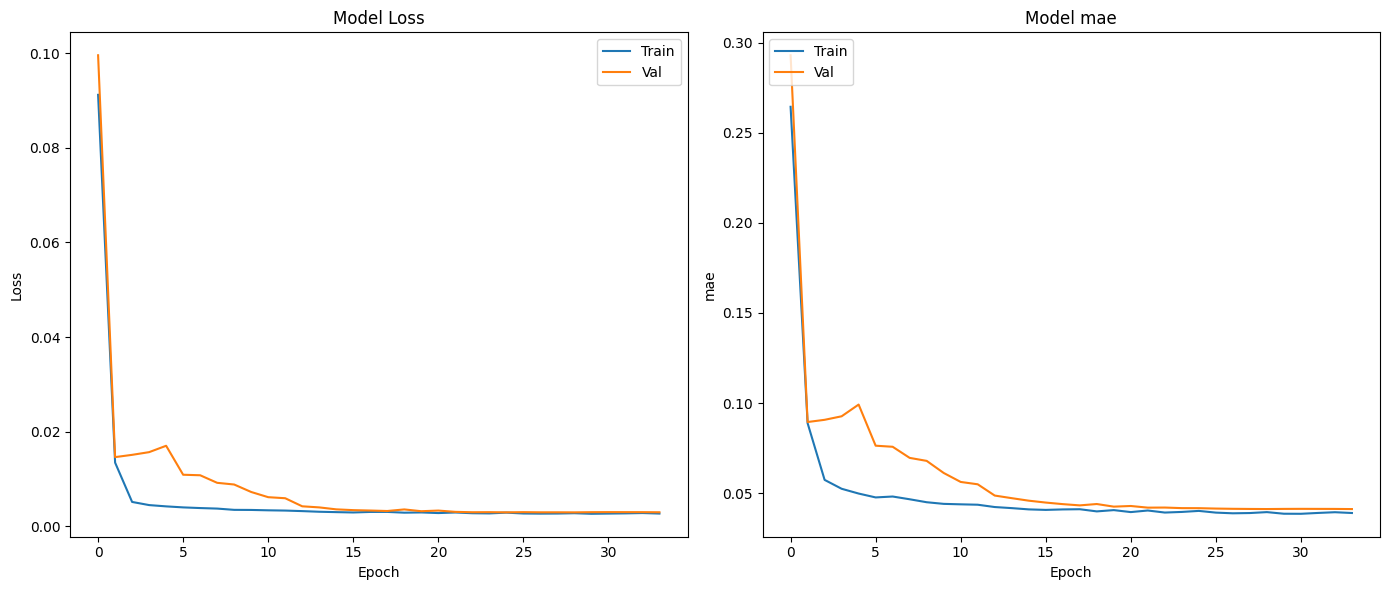

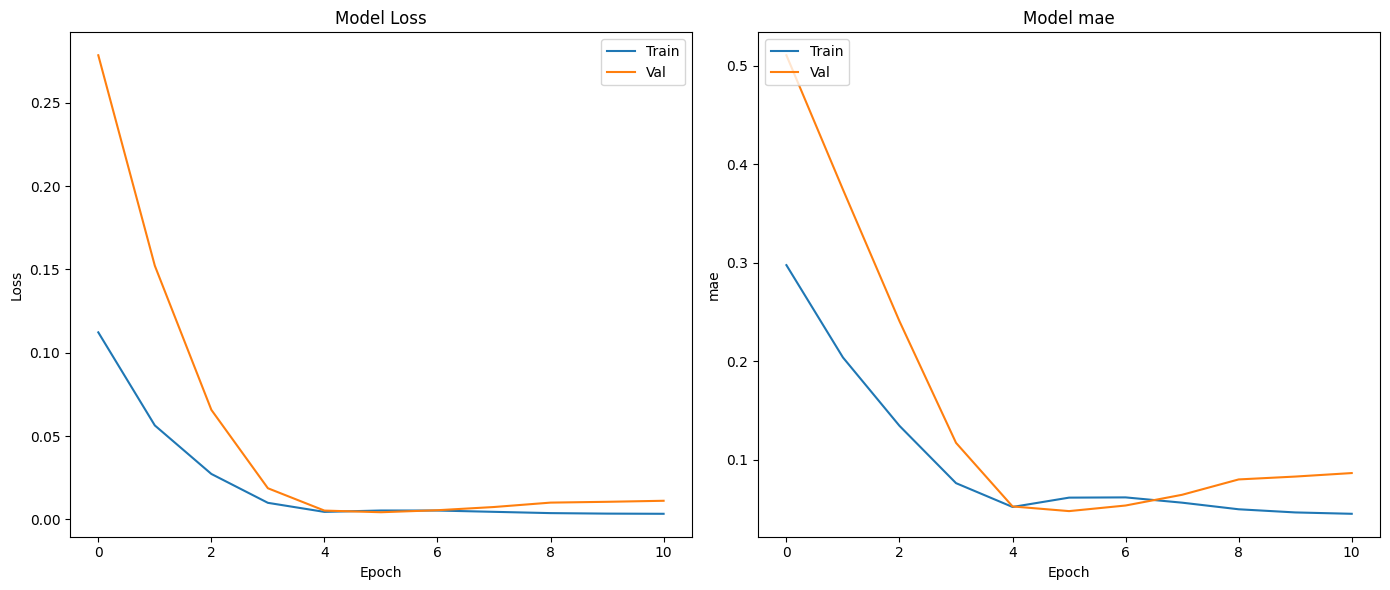

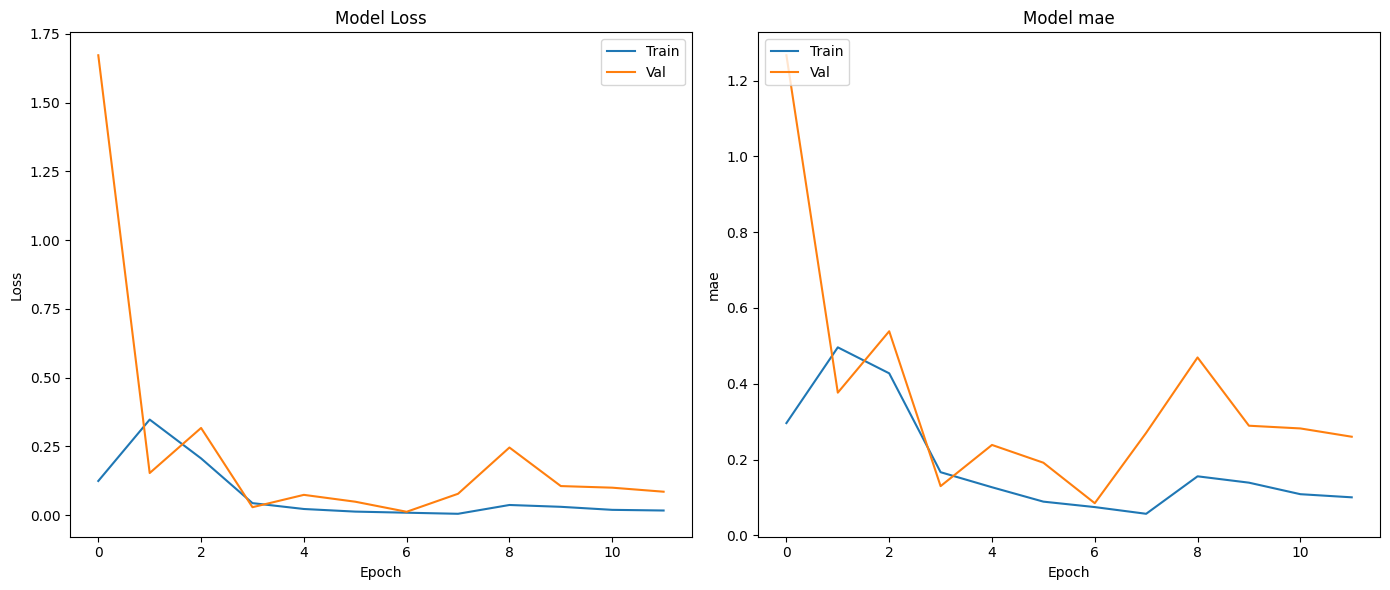

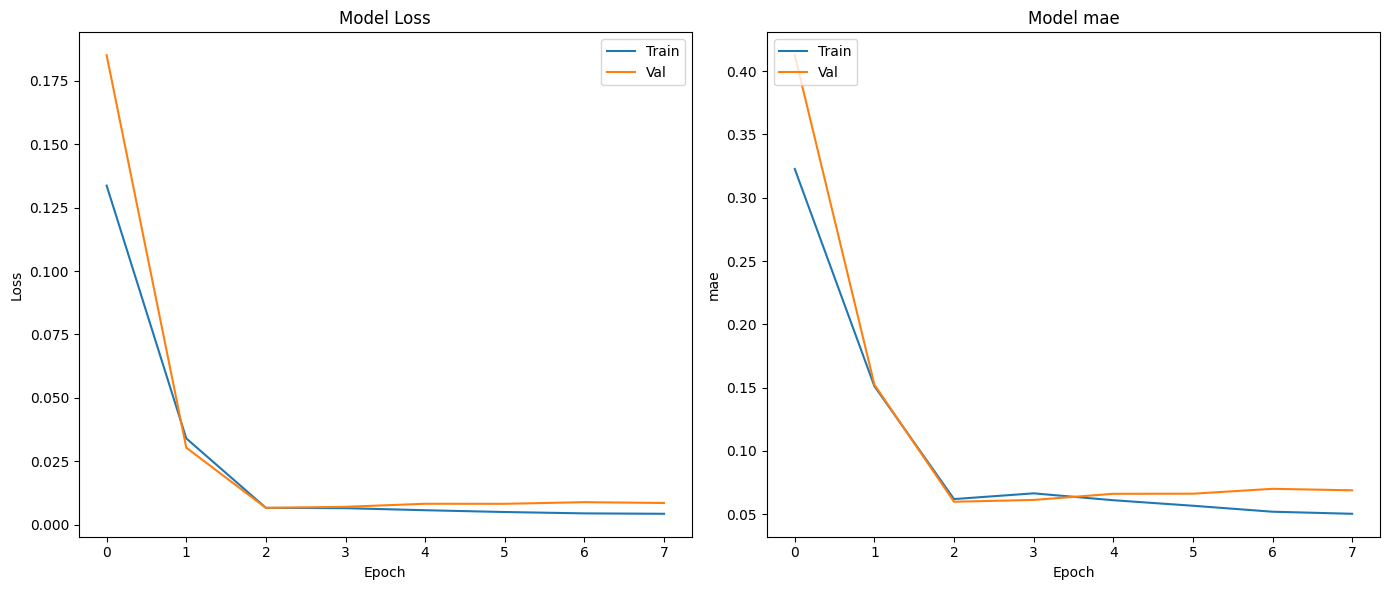

In [ ]:
plot_performance(history_lstm)
plot_performance(history_gru)
plot_performance(history_bilstm)
plot_performance(history_bigru)

## Evaluation

In [ ]:
print("========LSTM===========")
model_lstm = get_model_n_evaluate("/content/model_lstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_lstm = get_reverse_prediction(model_lstm, X_test_norm, y_scaler)
print()

print("========GRU===========")
model_gru = get_model_n_evaluate("/content/model_gru.keras", X_test_norm, y_test_norm)
y_pred_denorm_gru = get_reverse_prediction(model_gru, X_test_norm, y_scaler)
print()

print("=========BiLSTM===========")
model_bilstm = get_model_n_evaluate("/content/model_bilstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_bilstm = get_reverse_prediction(model_bilstm, X_test_norm, y_scaler)
print()

print("=========BiGRU===========")
model_bigru = get_model_n_evaluate("/content/model_bigru.keras", X_test_norm, y_test_norm)
y_pred_denorm_bigru = get_reverse_prediction(model_bigru, X_test_norm, y_scaler)

========LSTM===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0074 - mae: 0.0484
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.01528630219399929, mae = 0.07403558492660522
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
MSE on the test set:  0.01528630159156124
Shape of denormalized training set:  (831, 1)

========GRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - mae: 0.0431
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.009849665686488152, mae = 0.06040322780609131
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
MSE on the test set:  0.009849665805200249
Shape of denormalized training set:  (831, 1)

=========BiLSTM===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0080 - mae: 0.0514
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.01651078835129738, mae = 0.07814789563417435
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
MSE on the test set:  0.016510788238510404
Shape of denormalized training set:  (831

In [ ]:
#convo1d: 0.00047 0.0167
#lstm: 0.00036 0.014

## viz prediction

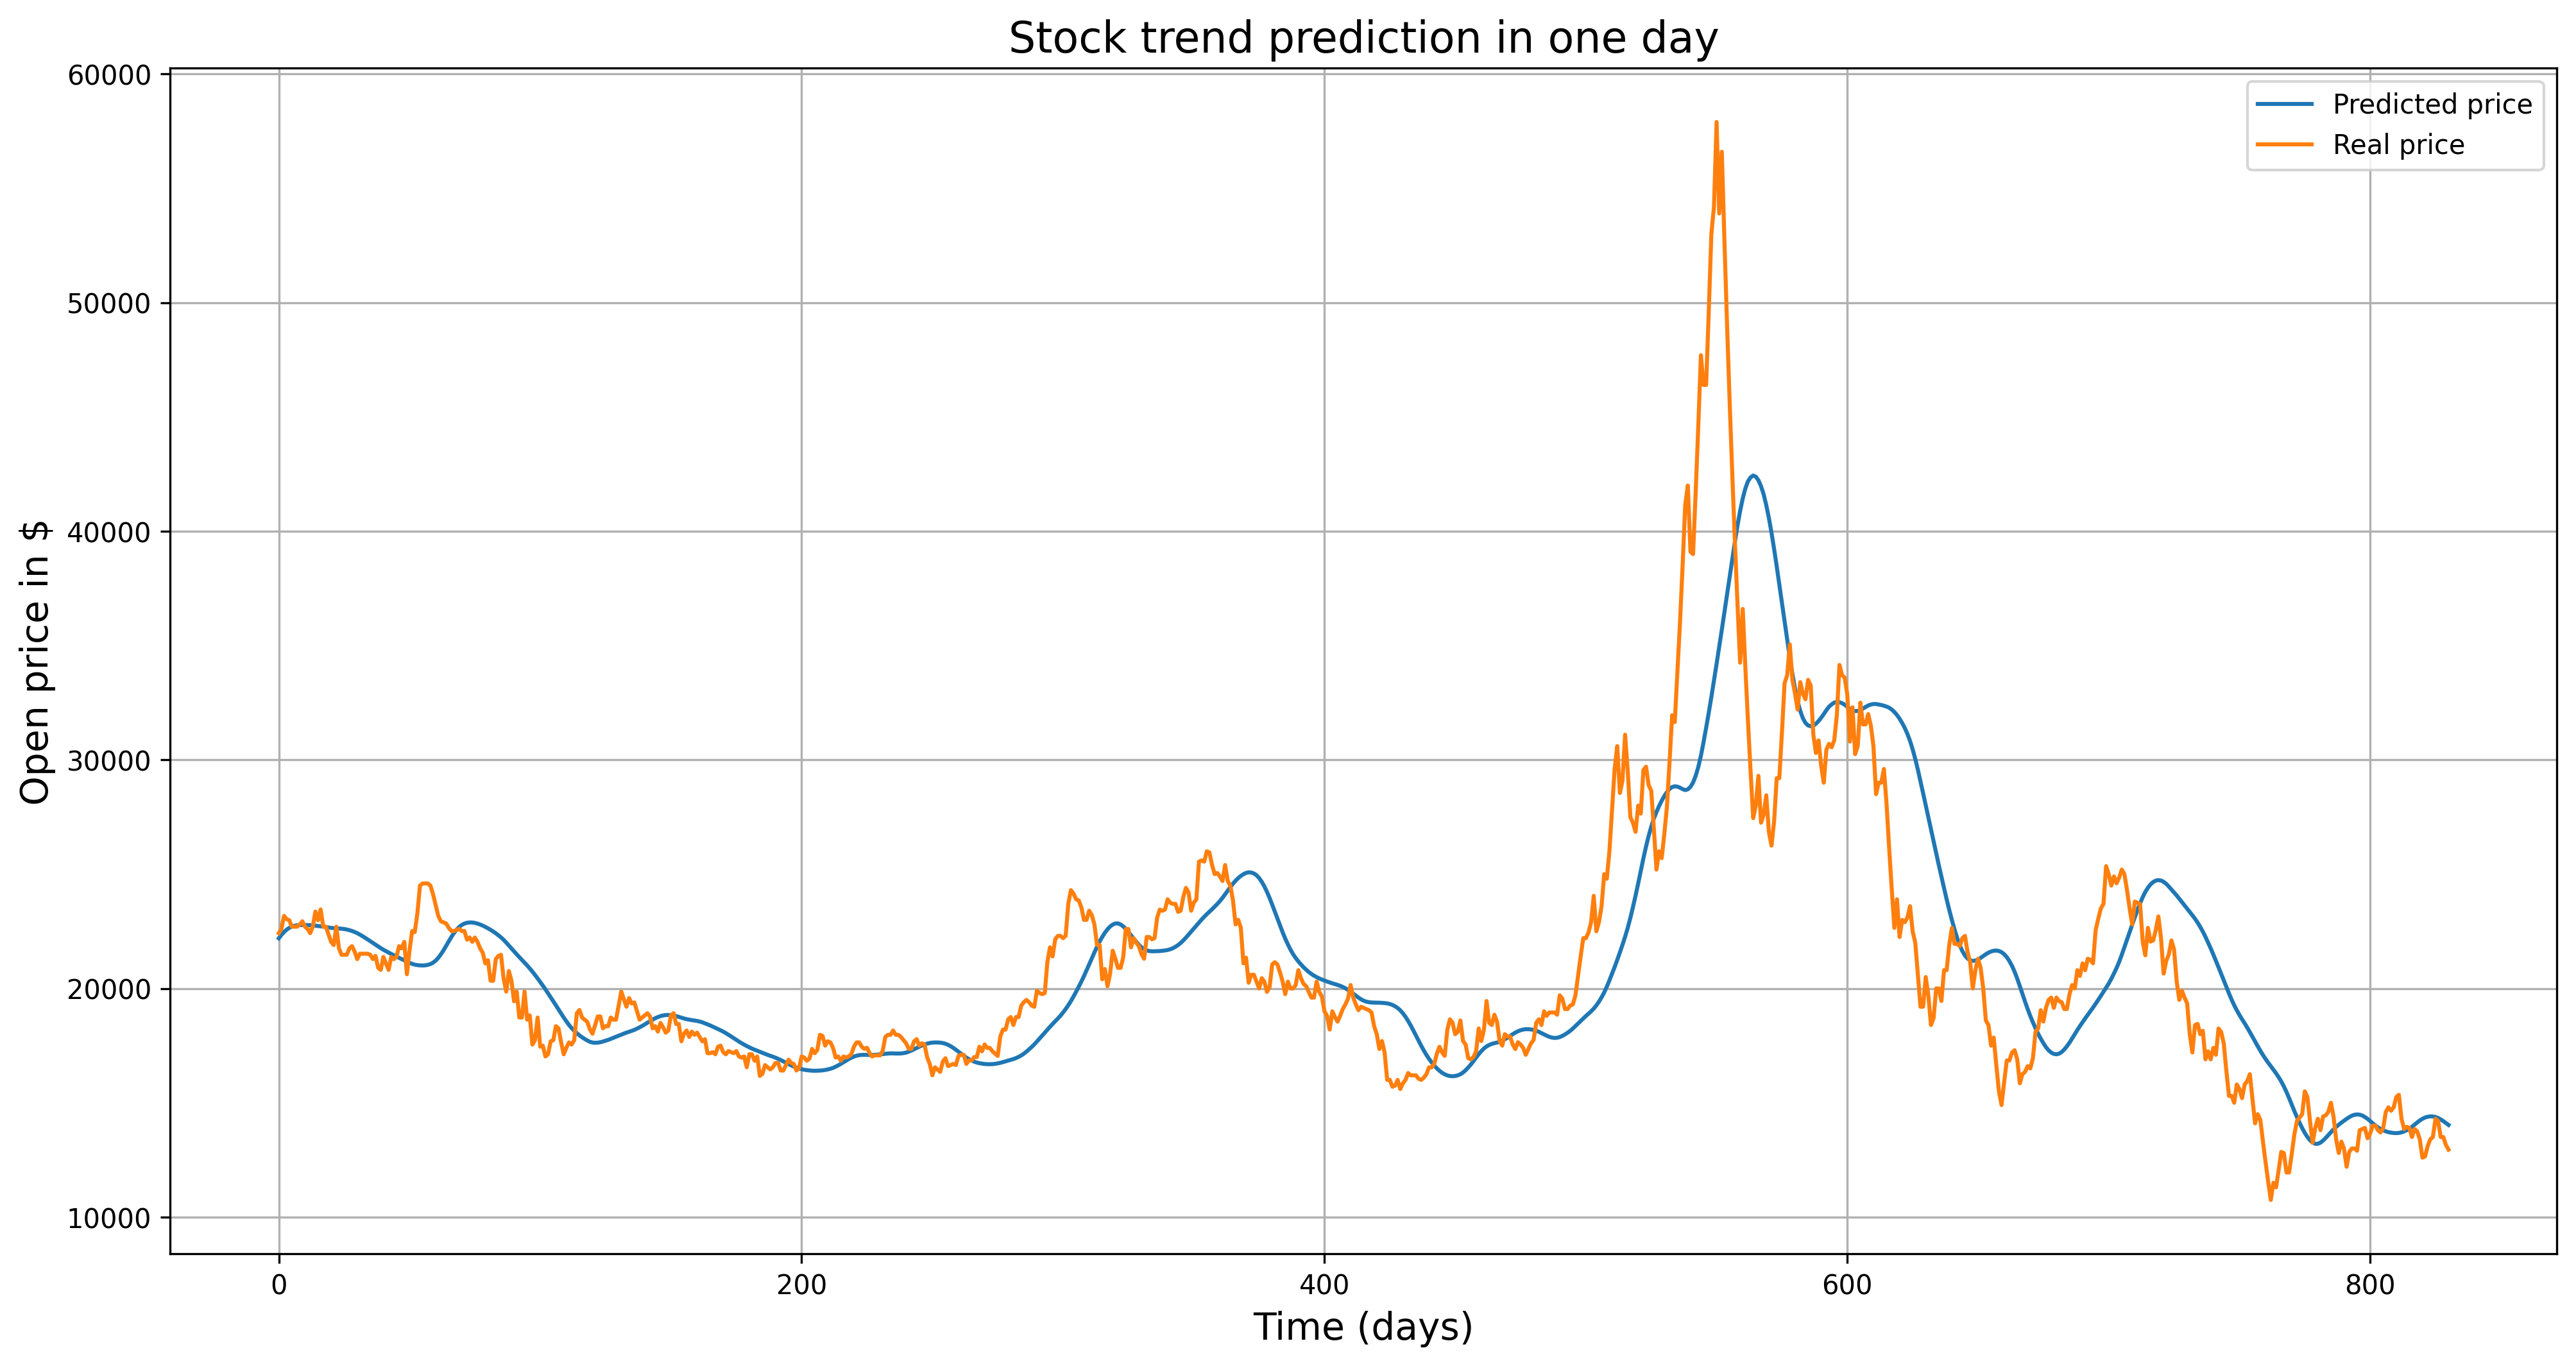

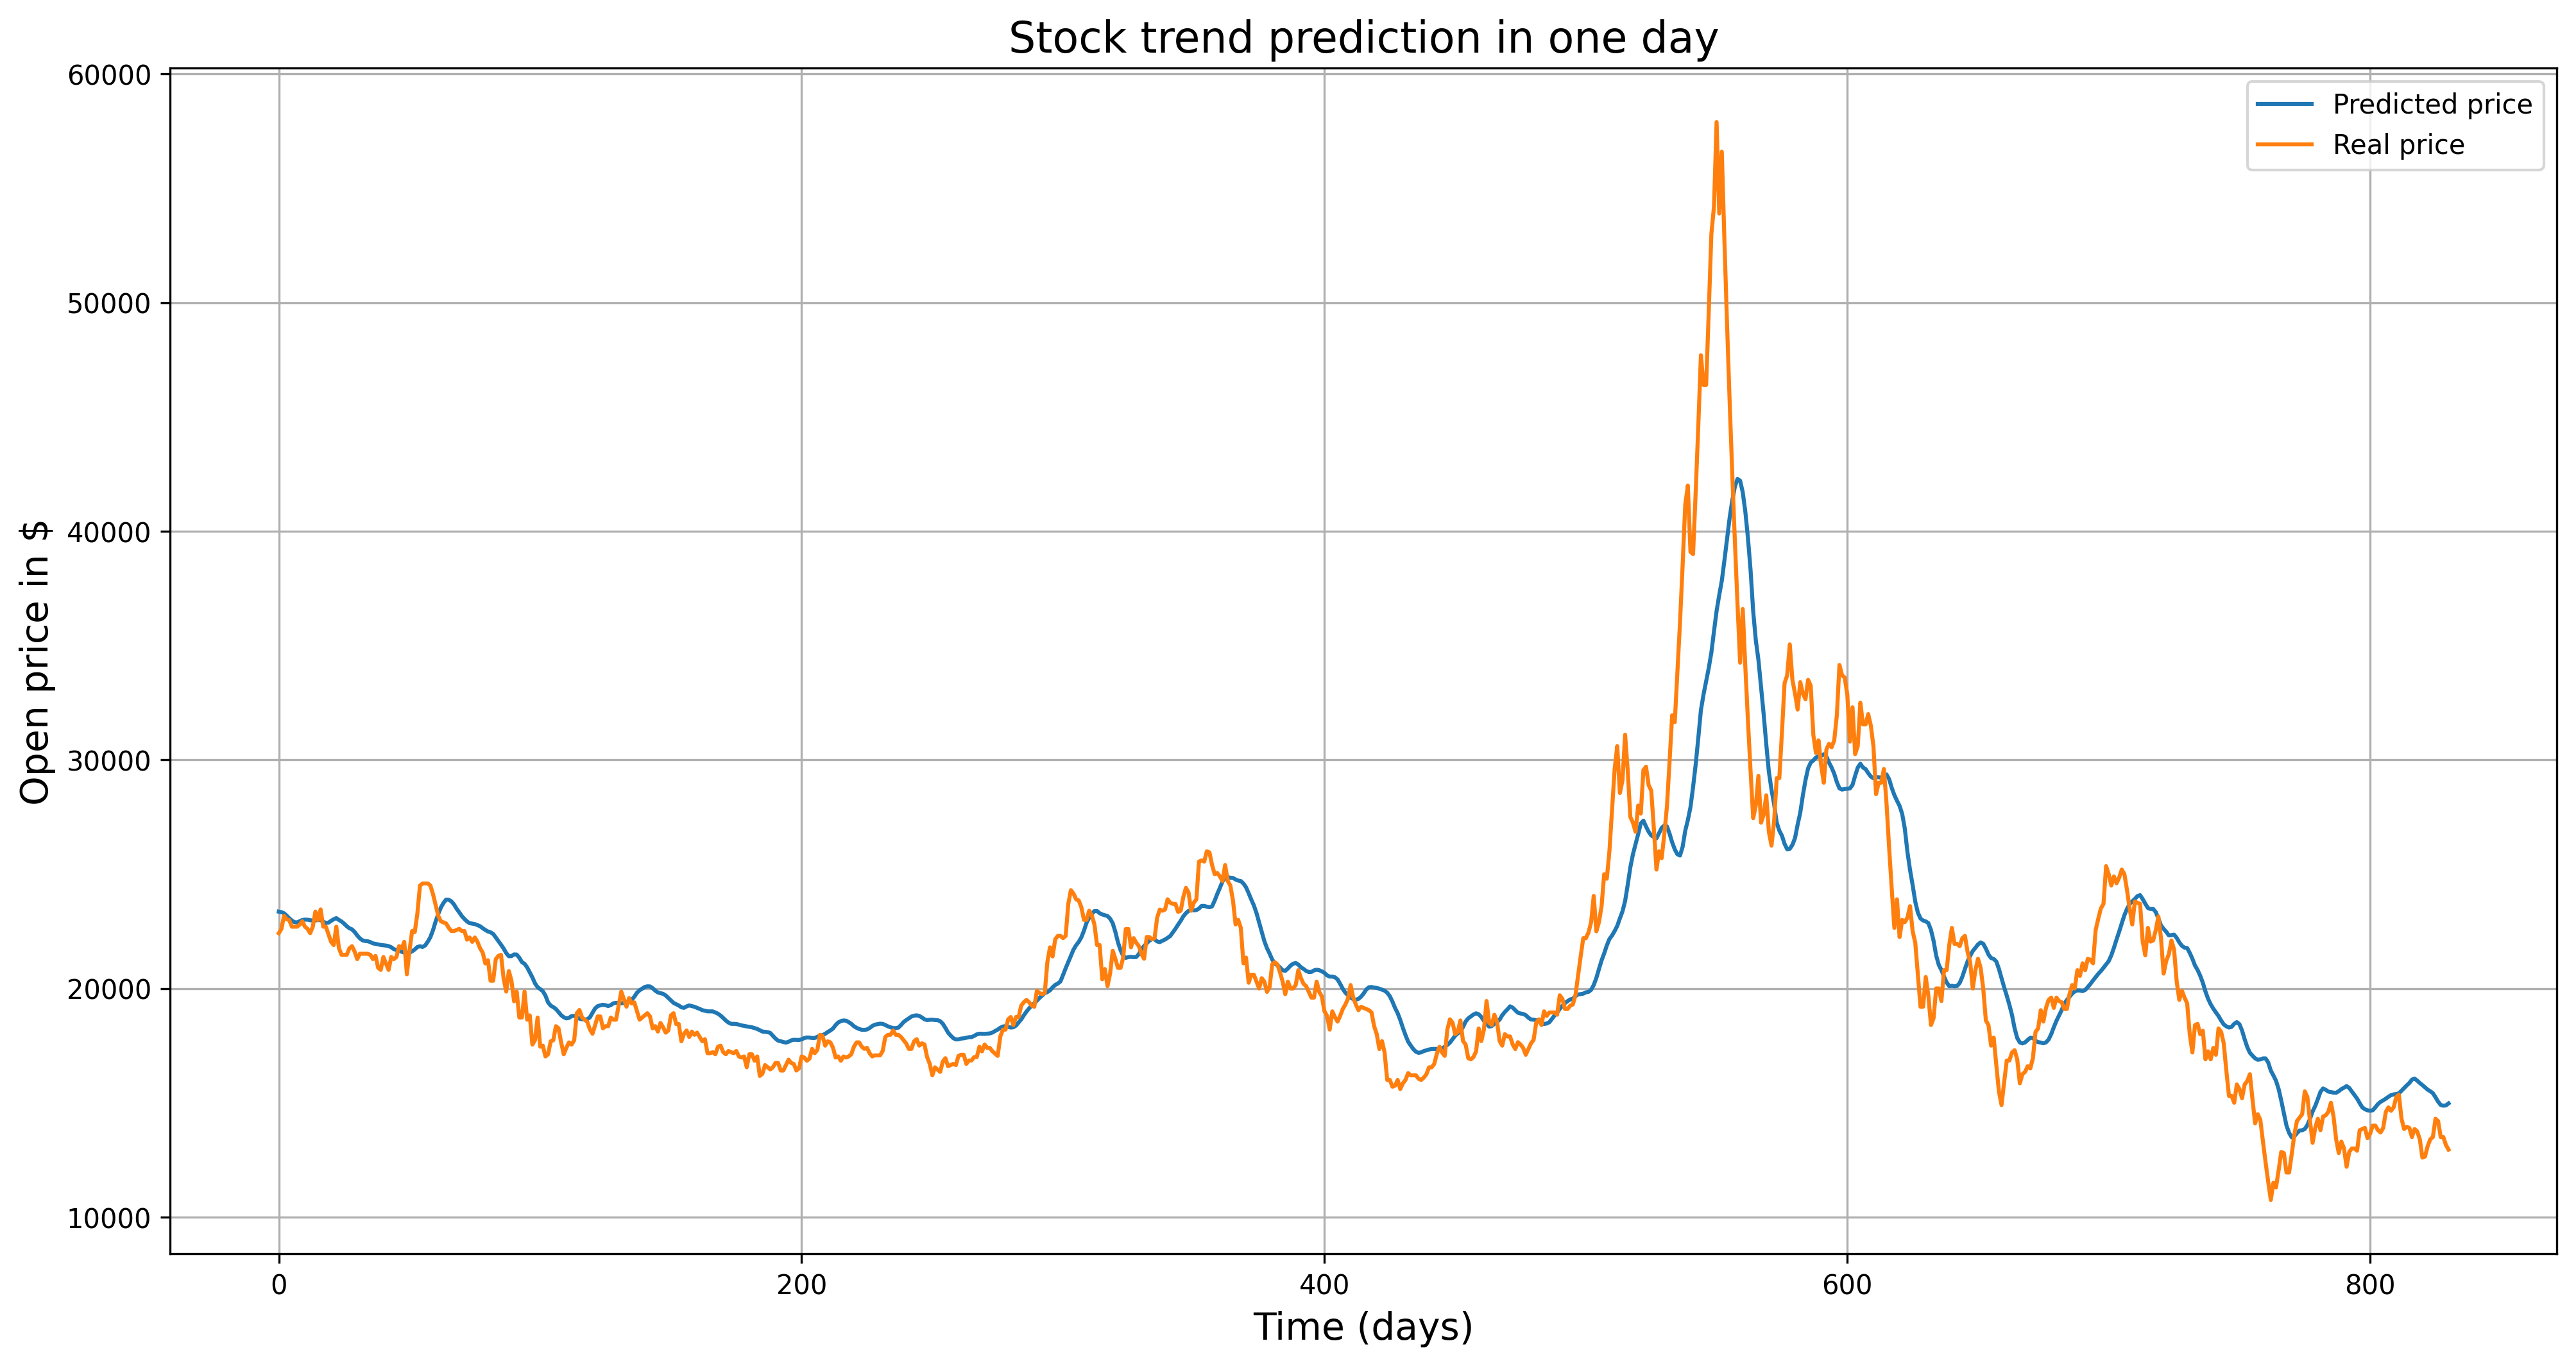

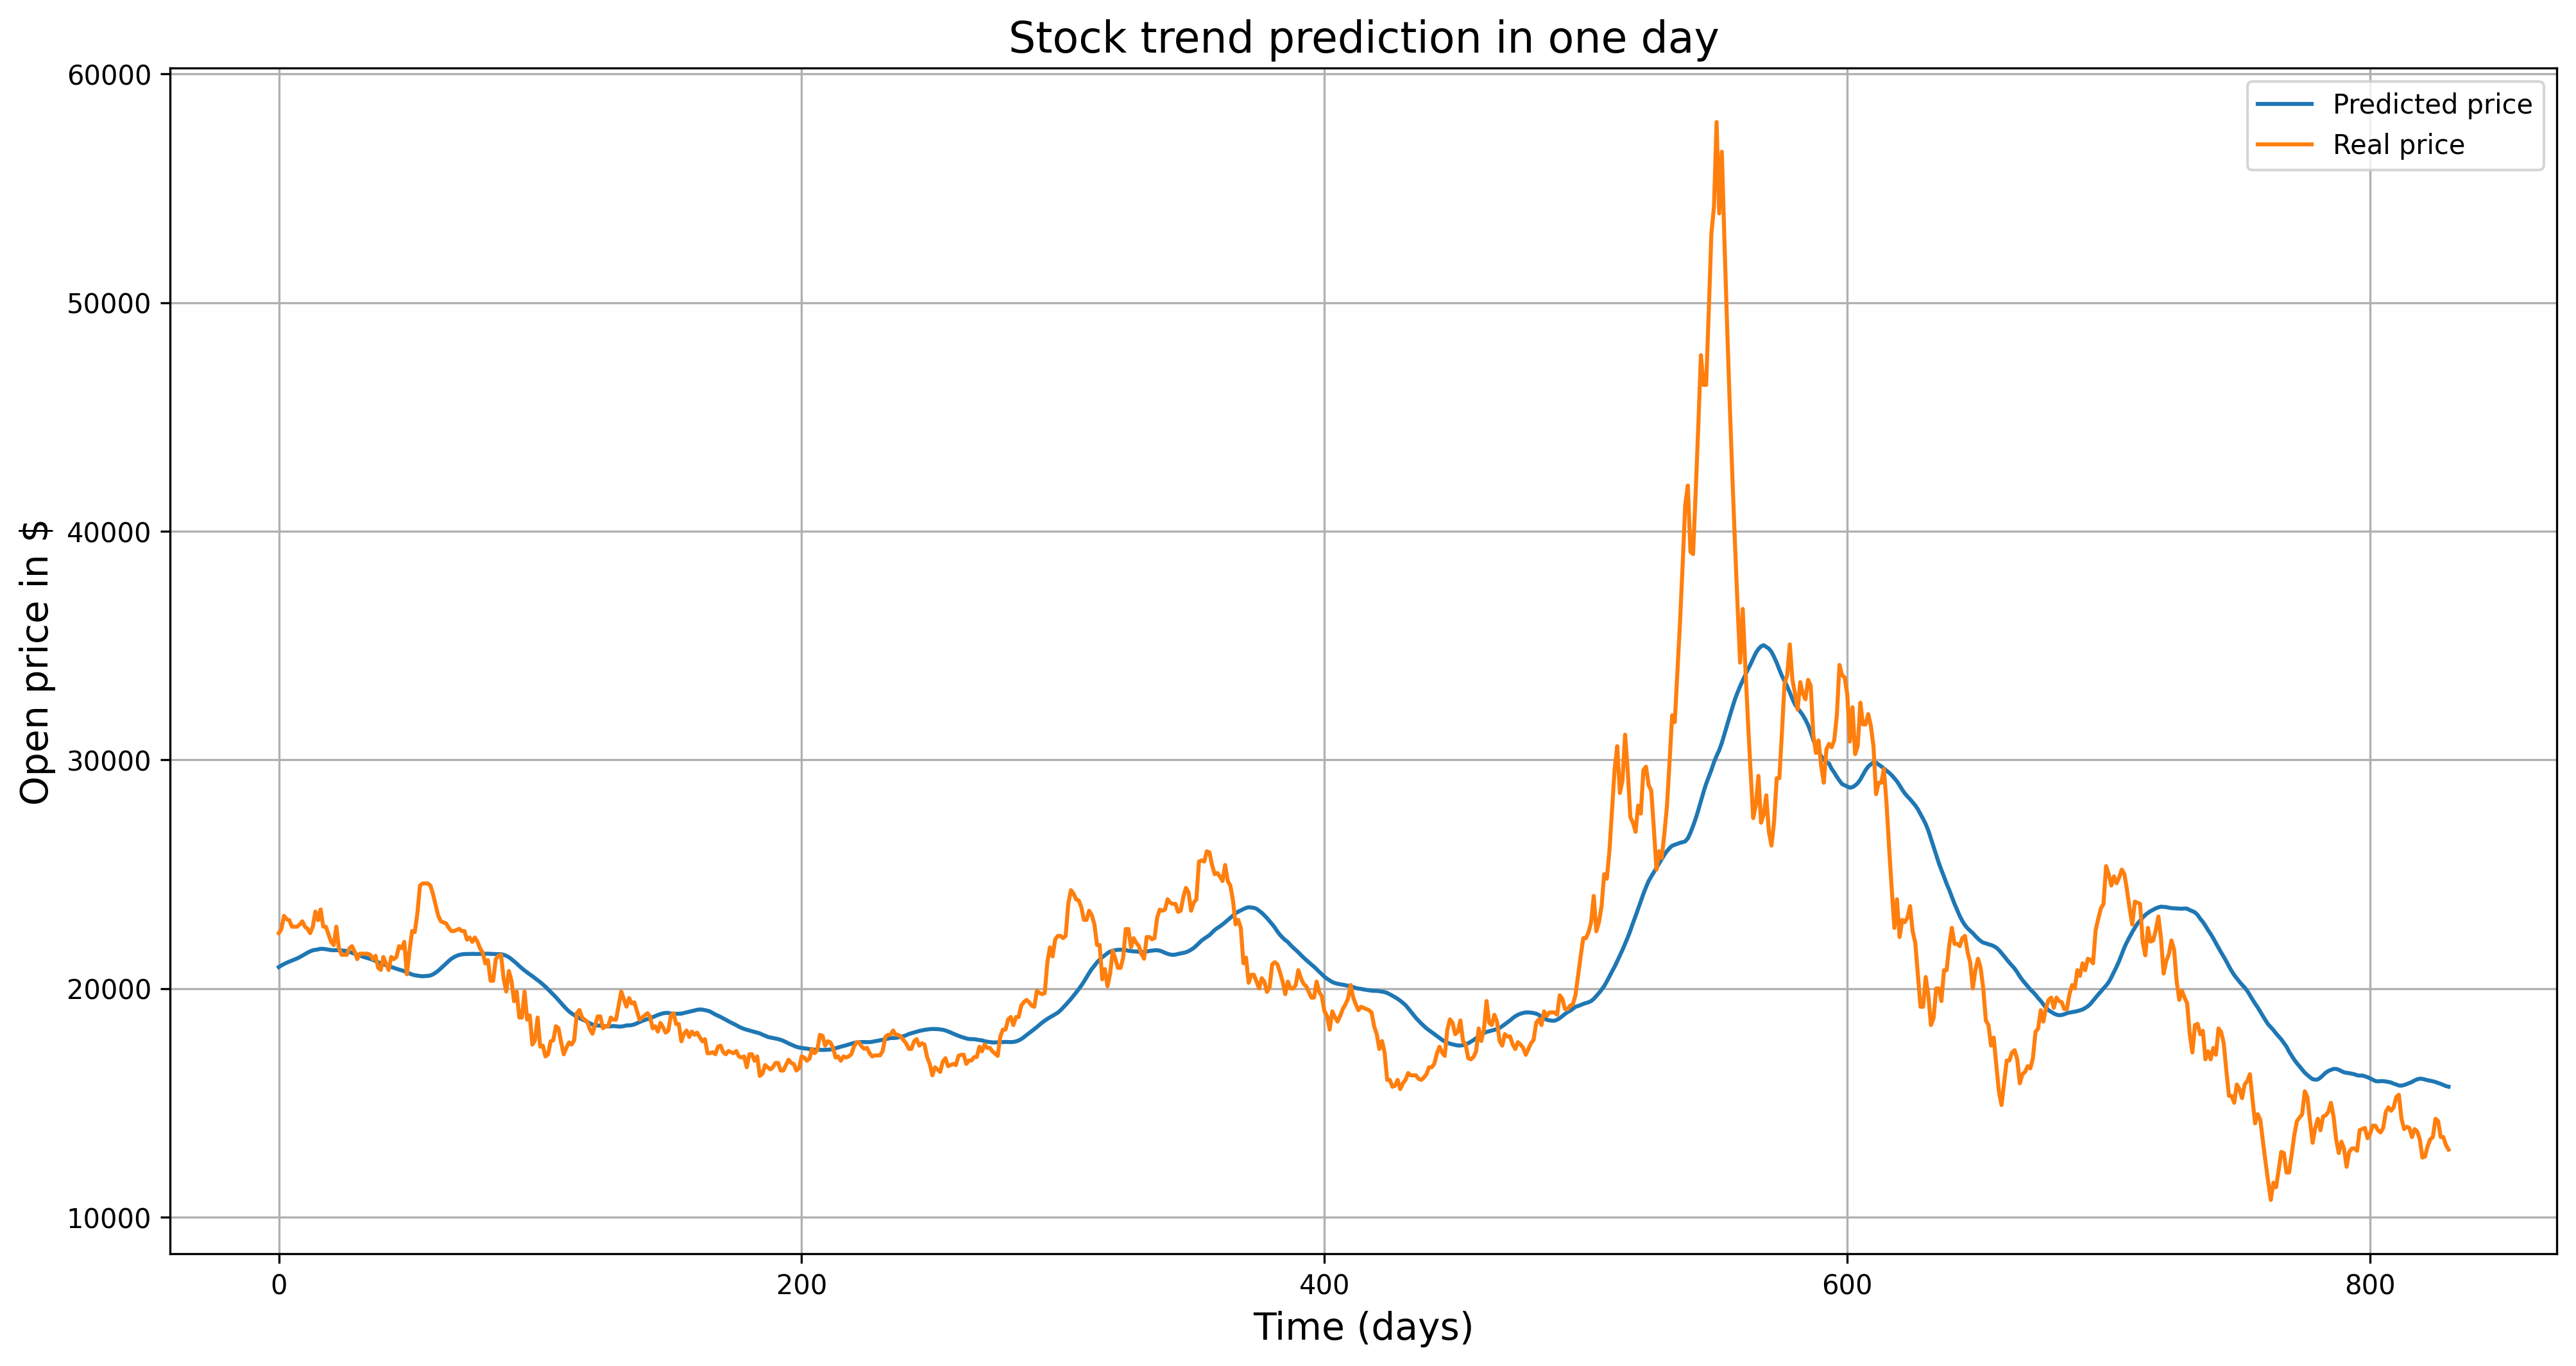

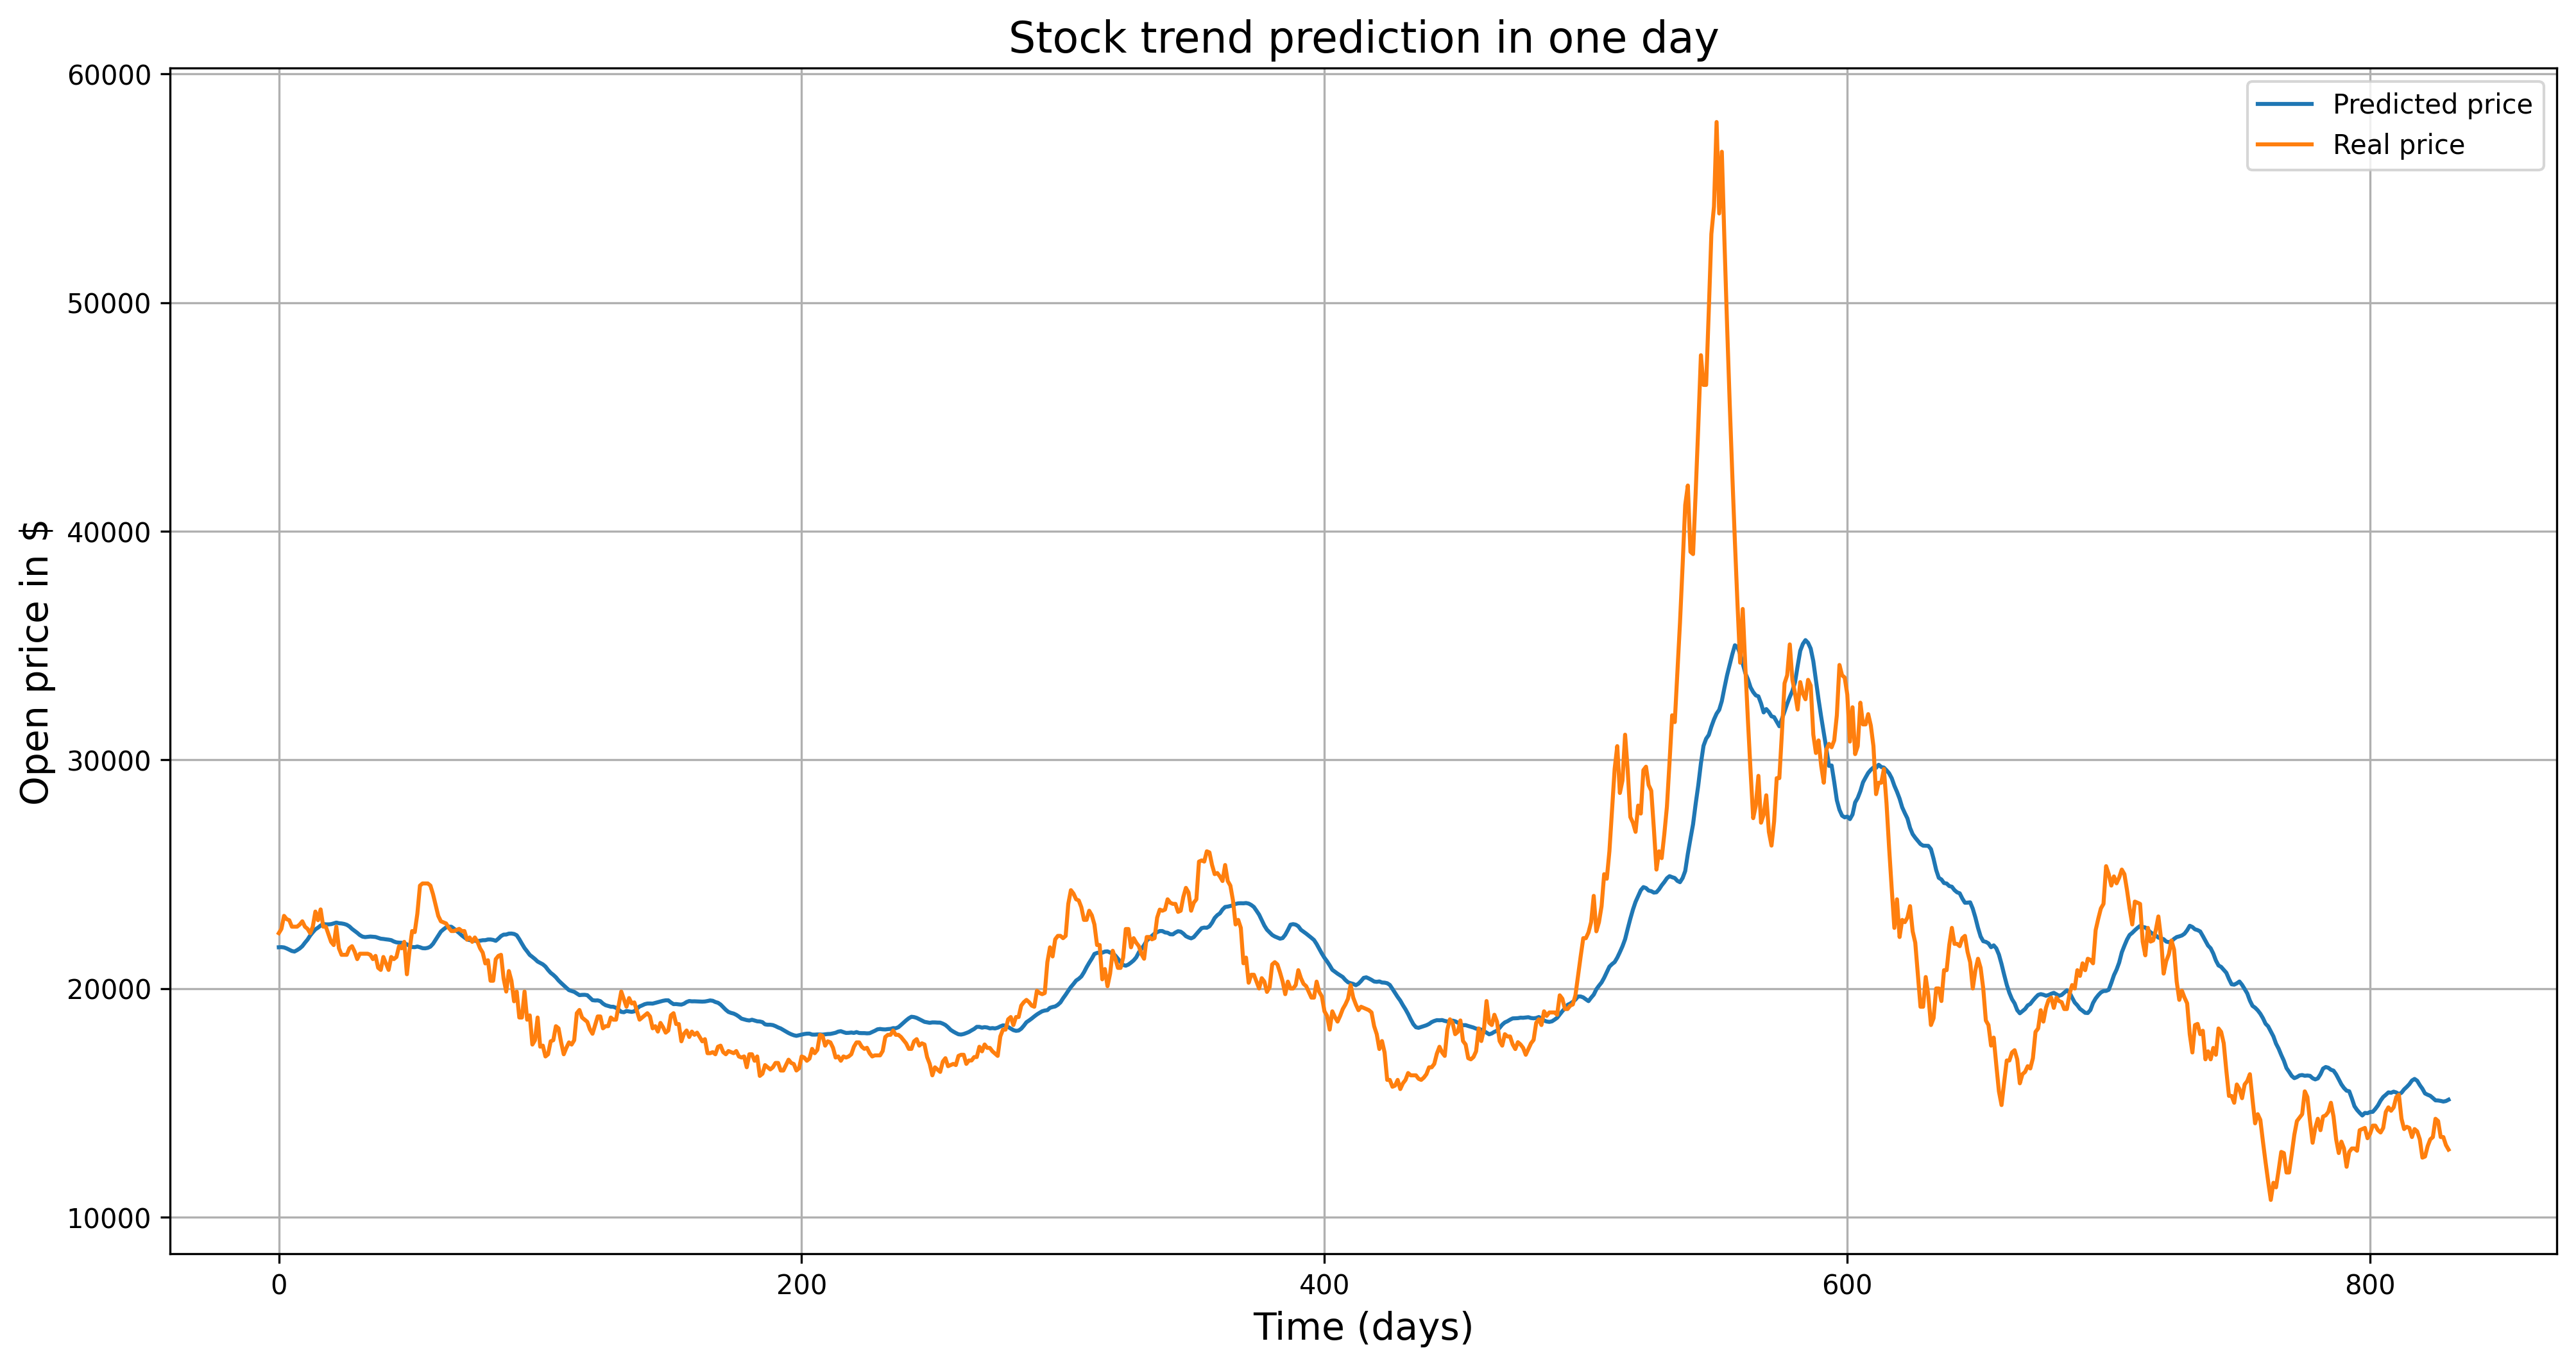

In [ ]:
plot_prediction(y_pred_denorm_lstm, y_test, "LSTM")
plot_prediction(y_pred_denorm_gru, y_test, "GRU")
plot_prediction(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction(y_pred_denorm_bigru, y_test, "BiGRU")

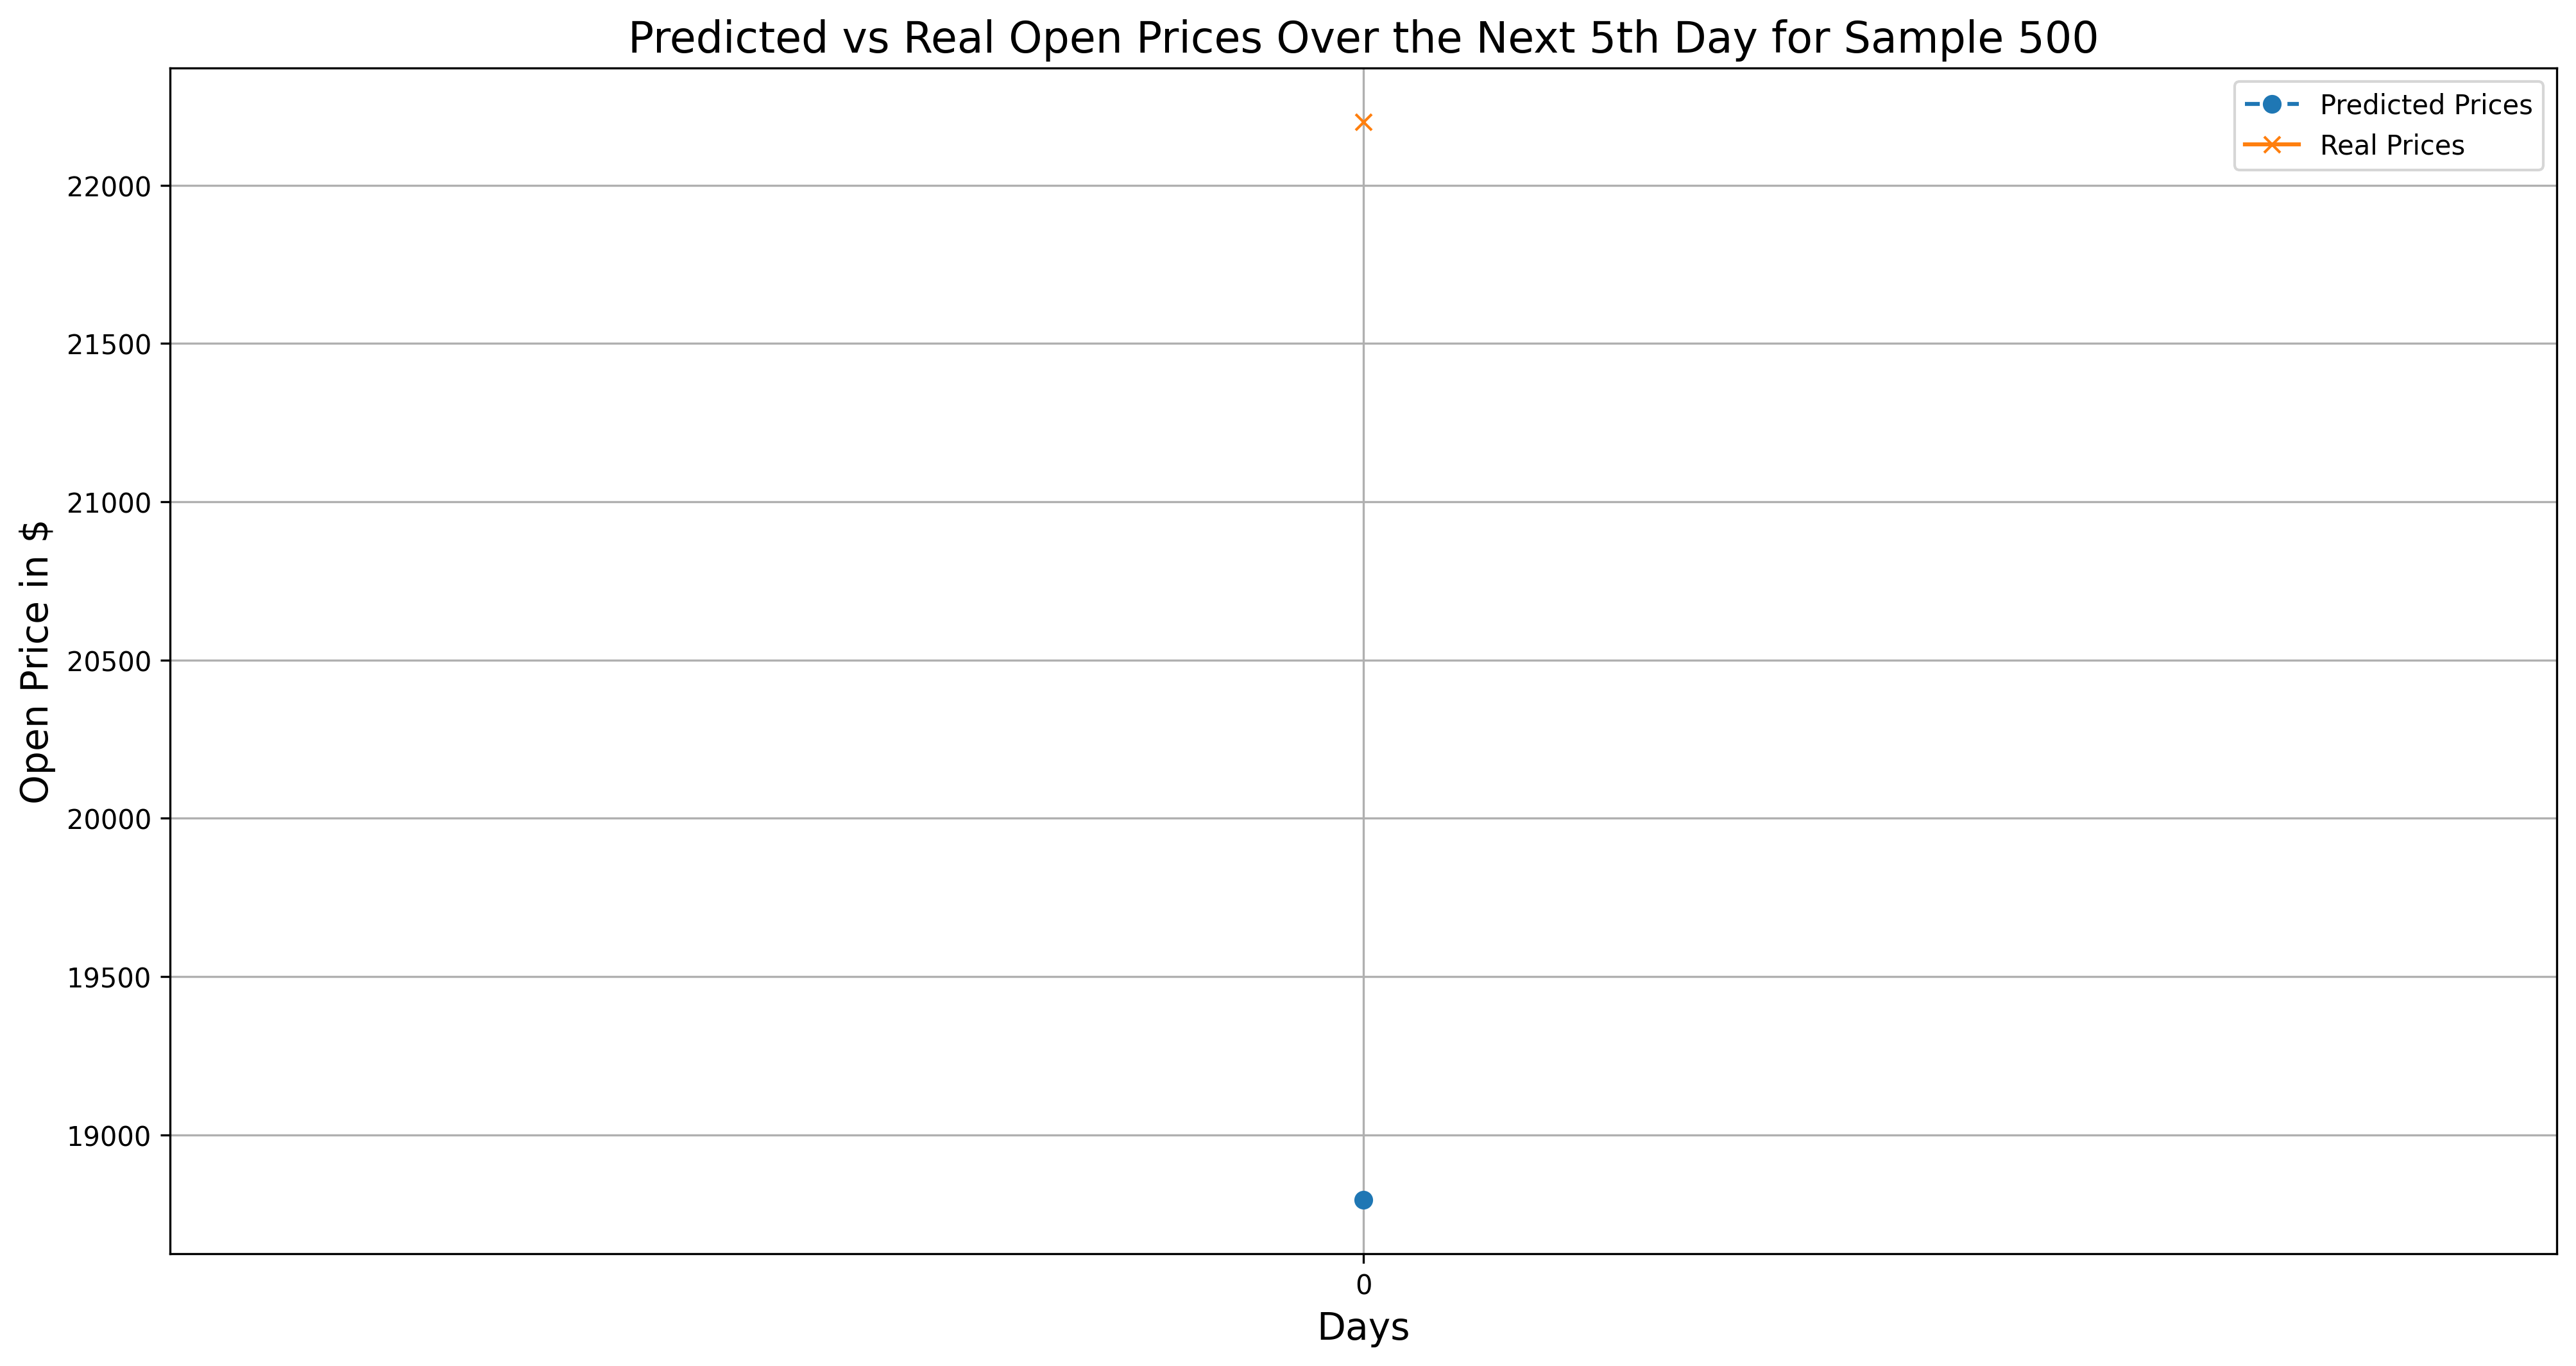

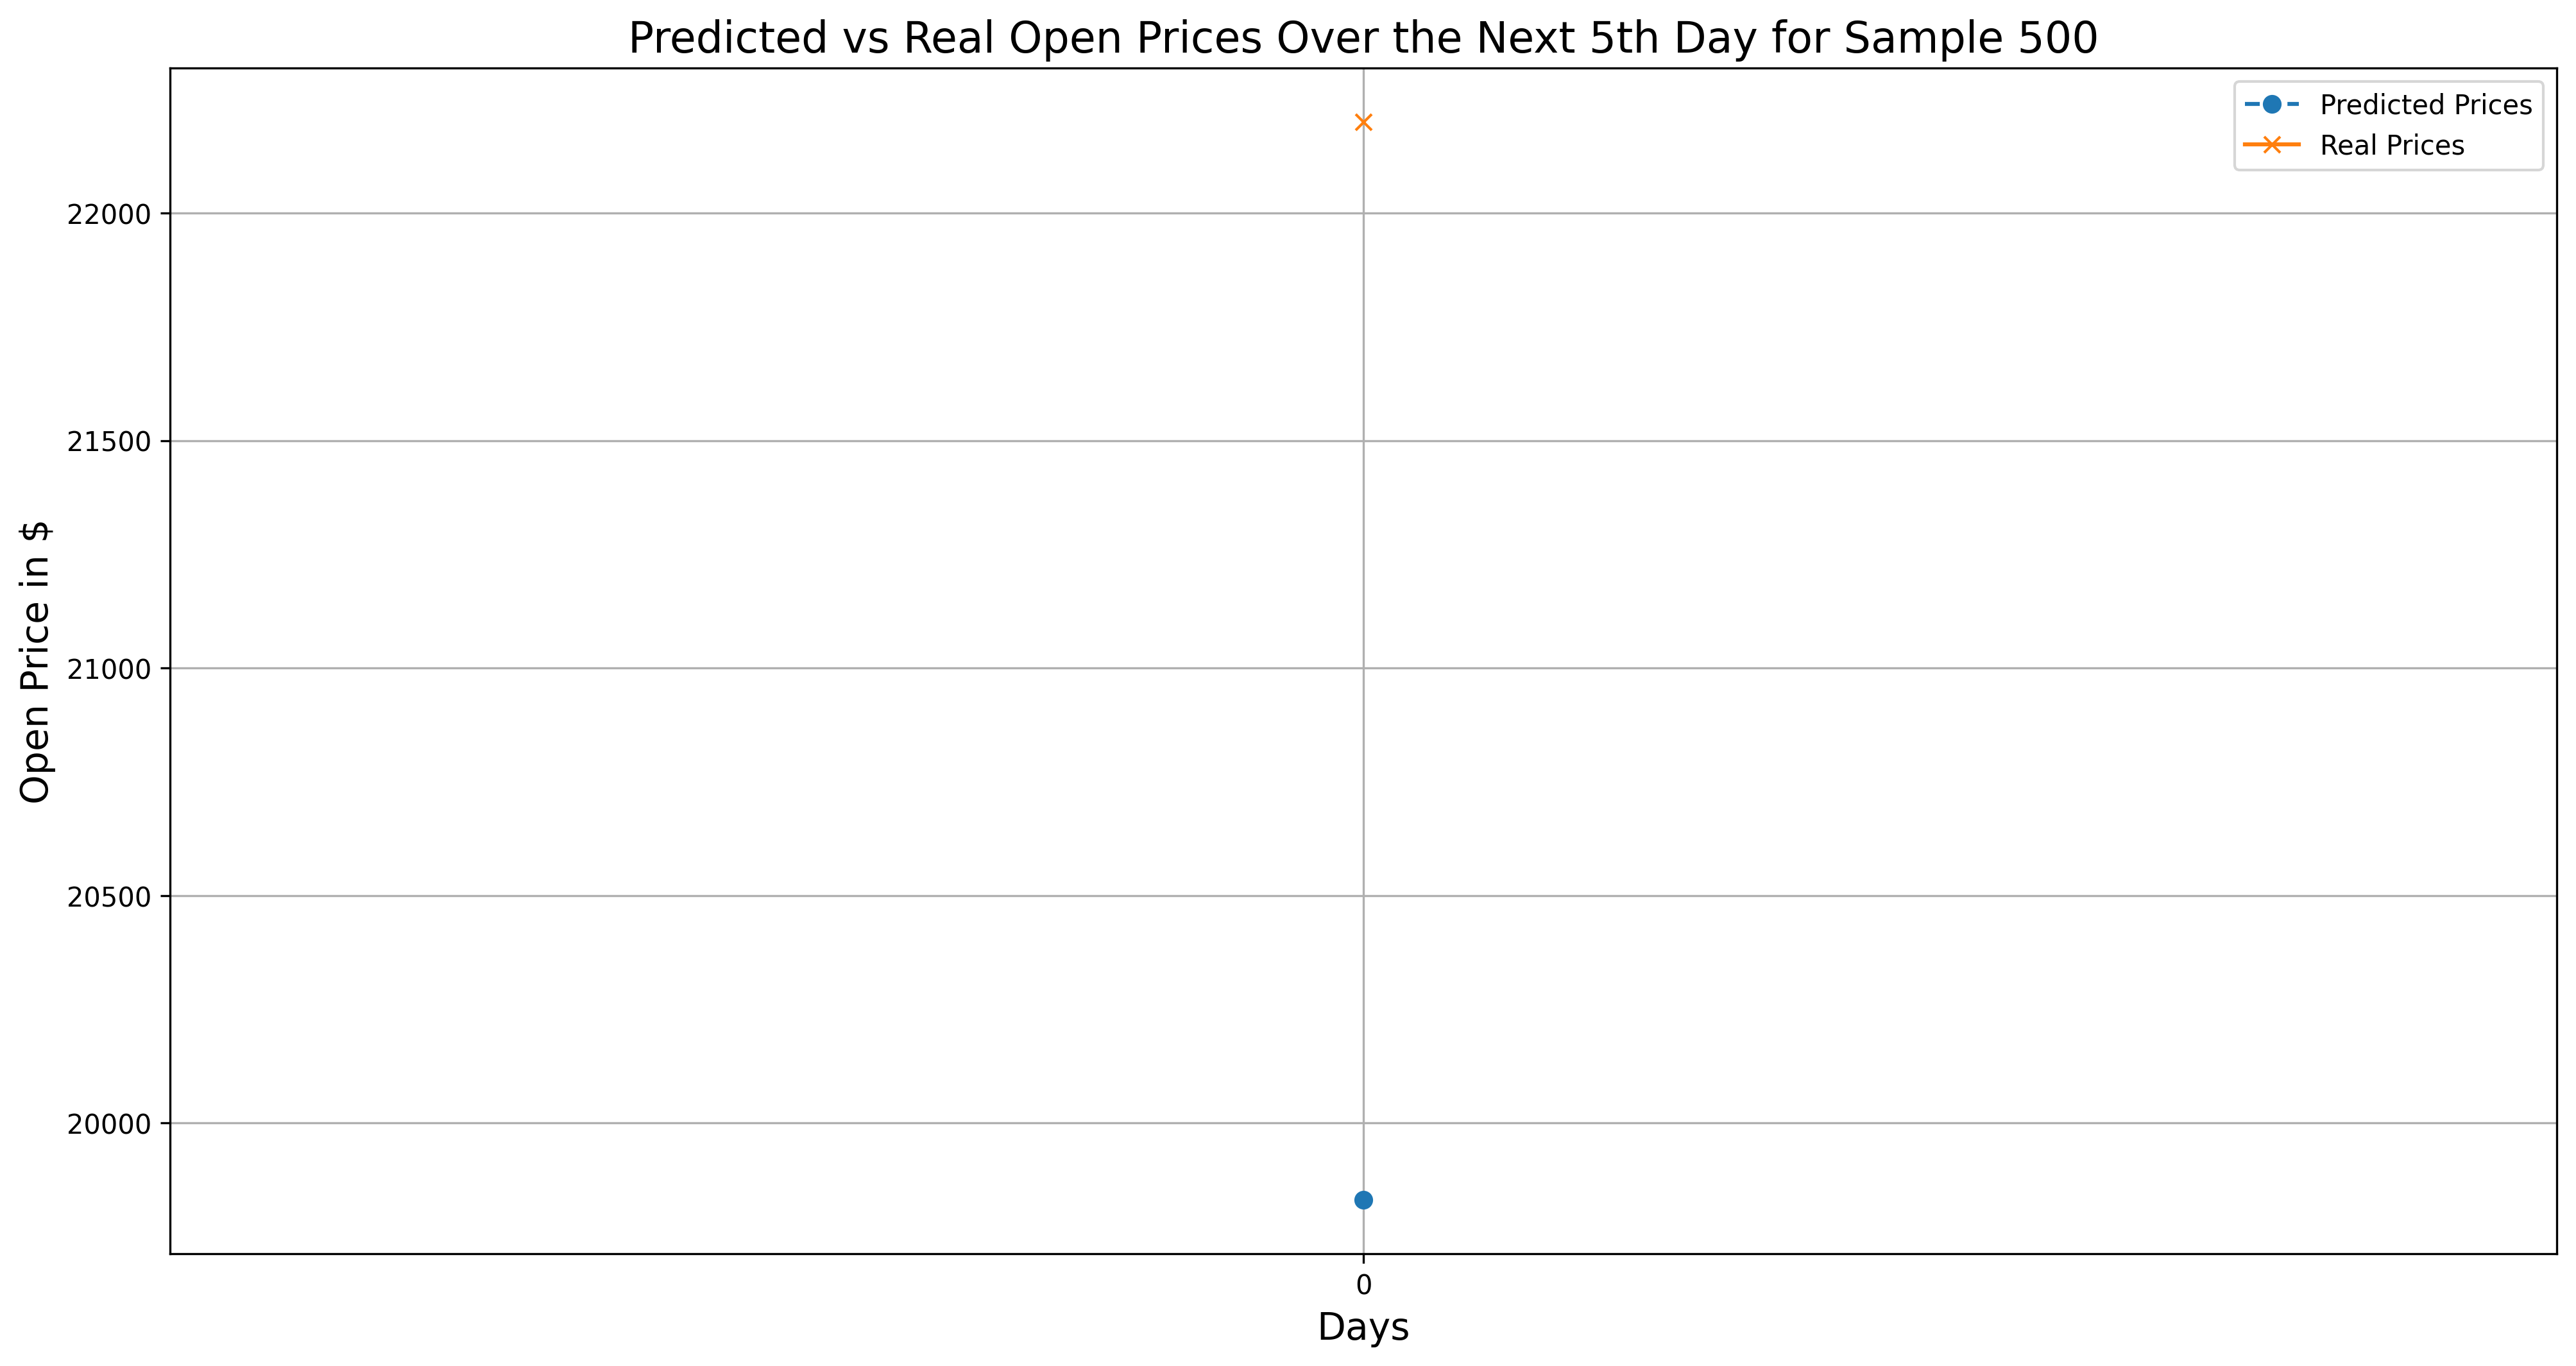

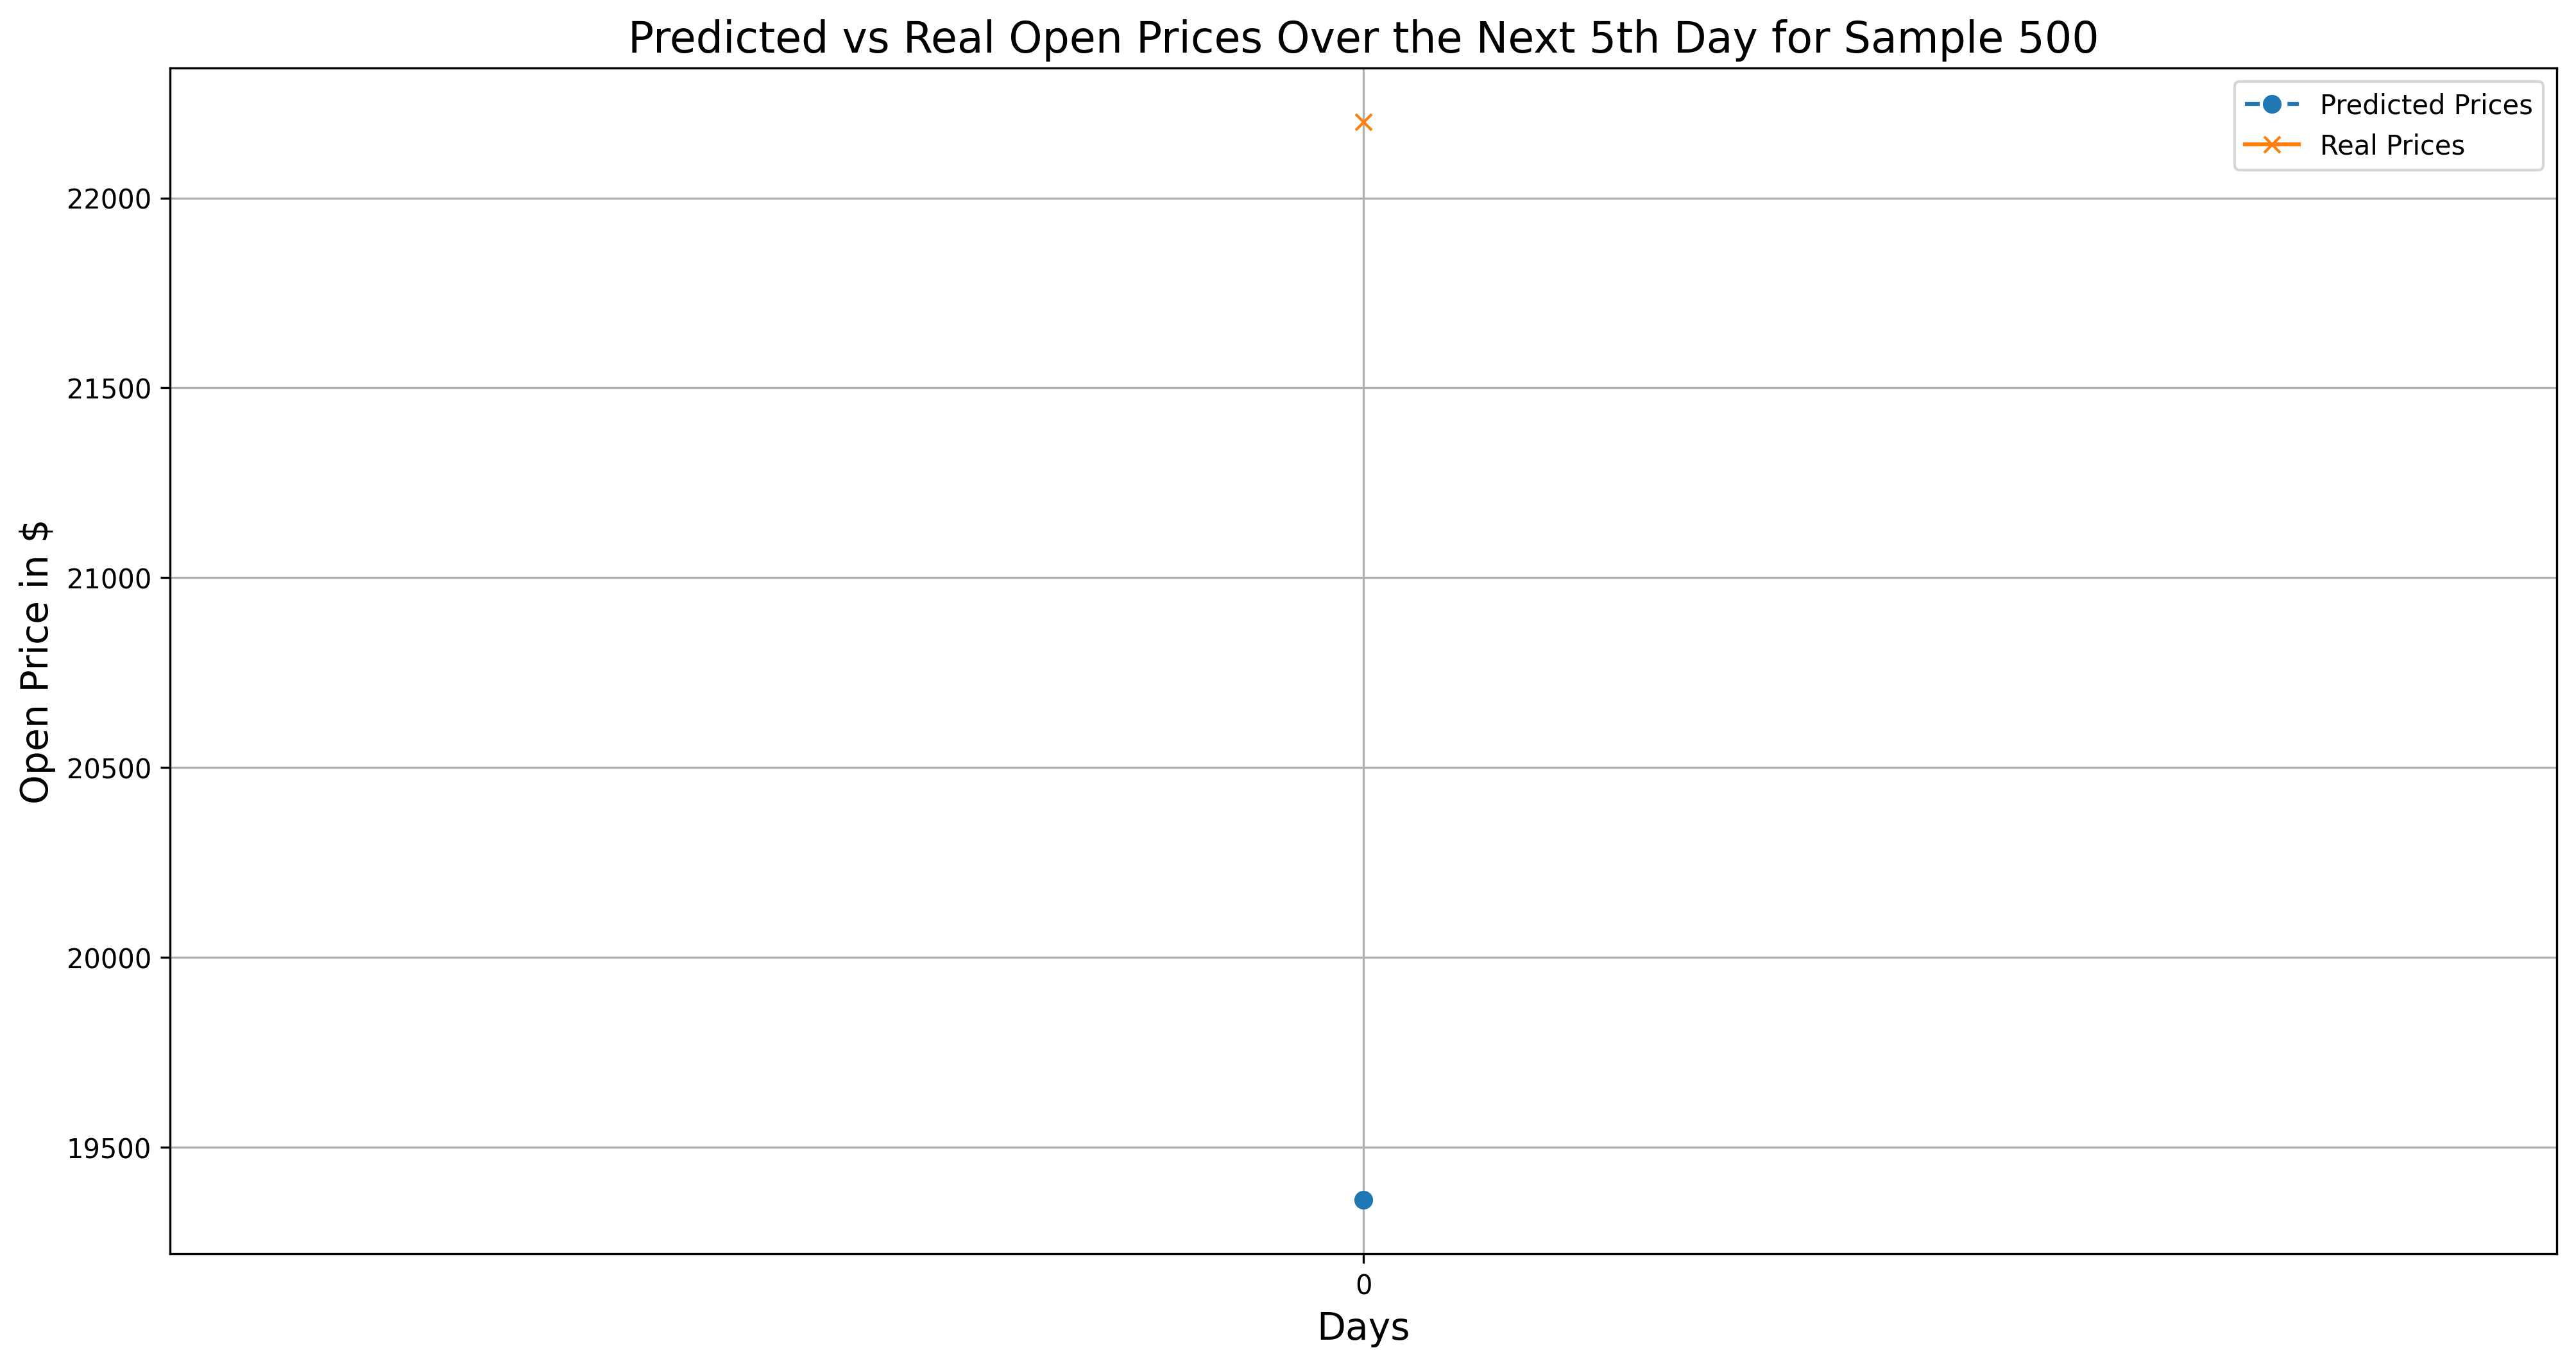

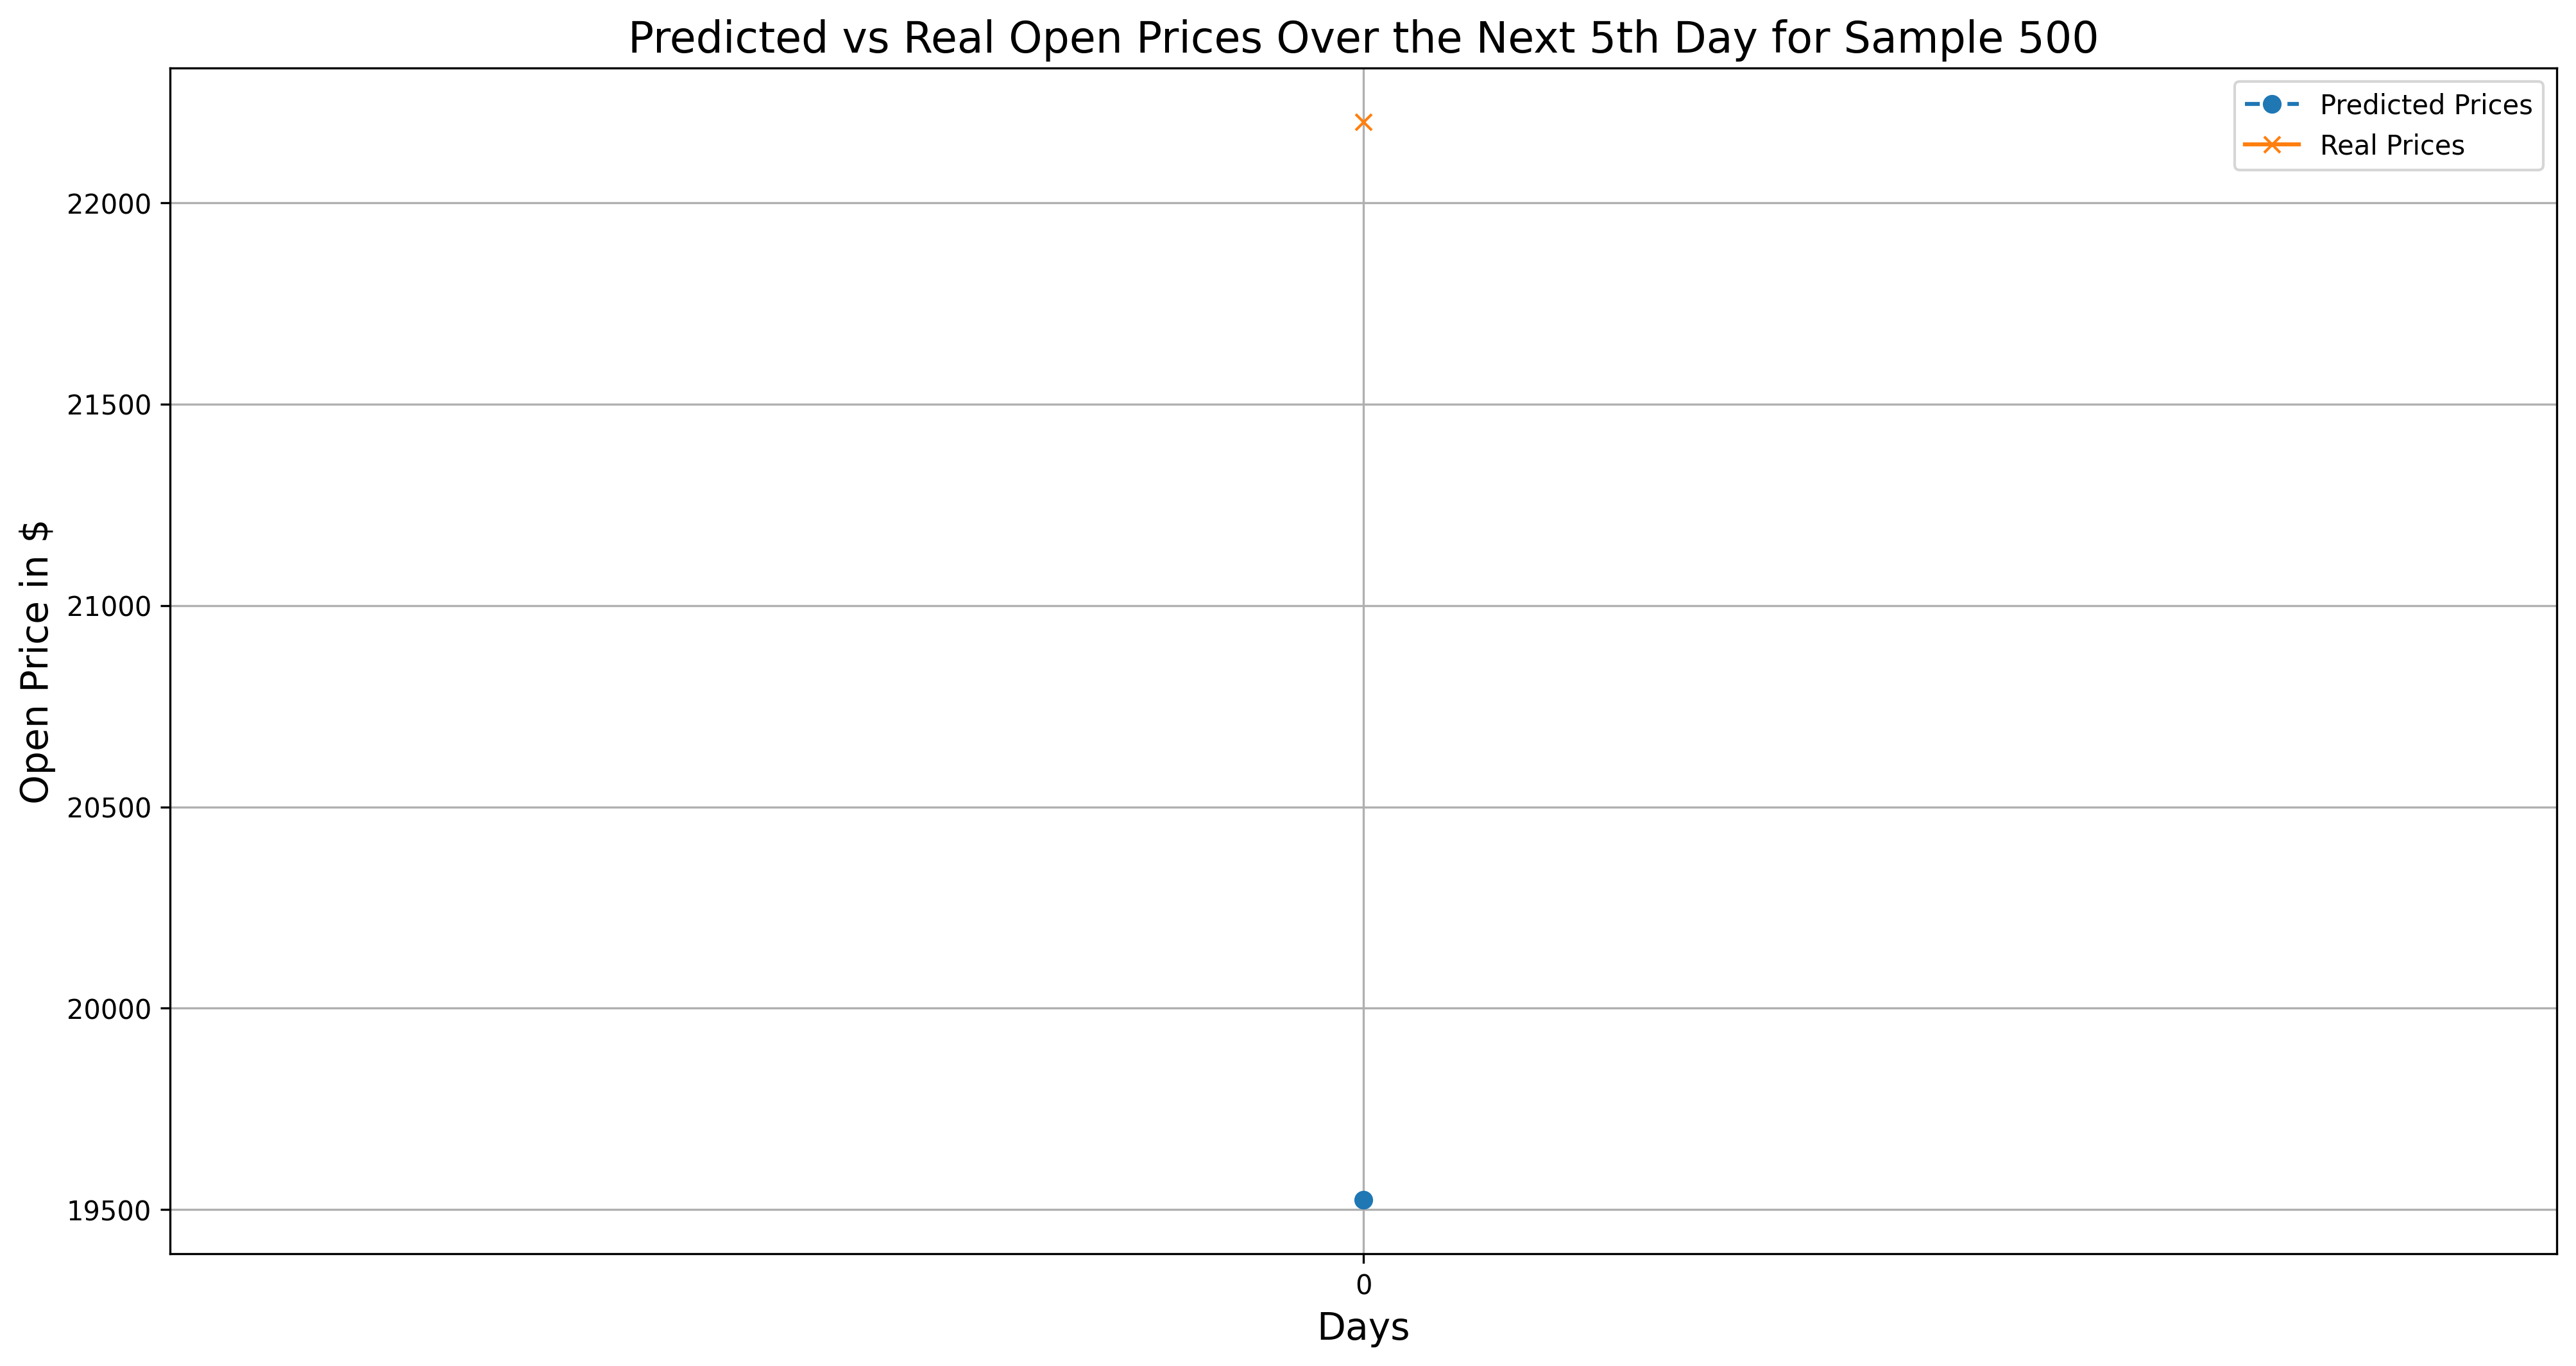

In [ ]:
plot_prediction_timestep(y_pred_denorm_lstm, y_test, "LSTM")
plot_prediction_timestep(y_pred_denorm_gru, y_test, "GRU")
plot_prediction_timestep(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction_timestep(y_pred_denorm_bigru, y_test, "BiGRU")